# Integration

**Created**: 28 June 2022

## Environment

In [109]:
library(tidyverse)
library(ggrepel)
library(data.table)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

## Load Data

In [2]:
gene.info <- read.table("/nfs/team282/data/gains_team282/gene_info_864_20412_hla.txt")

In [3]:
head(gene.info)

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,⋯,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ENSG00000230521,6,29887294,29888268,975,-,havana,gene,NA,NA,ENSG00000230521,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000225864,6,29722981,29723971,991,-,havana,gene,NA,NA,ENSG00000225864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000227766,6,29942075,29943067,993,-,havana,gene,NA,NA,ENSG00000227766,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000237669,6,30006121,30007116,996,-,havana,gene,NA,NA,ENSG00000237669,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000271581,6,31356647,31357637,991,+,havana,gene,NA,NA,ENSG00000271581,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000285647,6,31367057,31376088,9032,+,havana,gene,NA,NA,ENSG00000285647,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
modules <- read.csv("~/gains_team282/nikhil/expression/gene_expression/modules.csv") %>%
    merge(., gene.info, by.x="Gene", by.y=0)

In [5]:
head(modules)

,Gene,Module,seqnames,start,end,width,strand,source,type,score,⋯,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,ENSG00000000003,Module_13,X,100627108,100639991,12884,-,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,ENSG00000000419,Module_2,20,50934867,50958555,23689,-,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ENSG00000000457,Module_2,1,169849631,169894267,44637,-,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,ENSG00000000460,Module_6,1,169662007,169854080,192074,+,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ENSG00000000938,Module_15,1,27612064,27635185,23122,-,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,ENSG00000000971,Module_5,1,196652043,196747504,95462,+,ensembl_havana,gene,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
coloc.eqtl.mqtl <- read.csv("~/gains_team282/nikhil/colocalization/cis_eqtl_module_qtl.csv")

In [7]:
head(coloc.eqtl.mqtl)

,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,Gene,eQTL.Signal,Eigengene,Module.QTL,Coloc.Factor
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
1,1725,1.325296e-105,3.679035e-80,3.602294e-29,0,1,ENSG00000142089,1,ME_106_2,ME_106_2-11:1-1332794,1
2,1706,2.701629e-145,1.739698e-110,1.552930e-38,0,1,ENSG00000251661,2,ME_106_2,ME_106_2-11:1-1332794,1
3,1695,9.885529e-160,1.739698e-110,5.682324e-53,0,1,ENSG00000254910,2,ME_106_2,ME_106_2-11:1-1332794,1
4,1695,1.538896e-98,3.679035e-80,4.182879e-22,0,1,ENSG00000254910,3,ME_106_2,ME_106_2-11:1-1332794,1
5,1724,2.803508e-134,1.739698e-110,1.611491e-27,0,1,ENSG00000255328,3,ME_106_2,ME_106_2-11:1-1332794,1
6,1722,1.886565e-163,1.739698e-110,1.084421e-56,0,1,ENSG00000270030,1,ME_106_2,ME_106_2-11:1-1332794,1


In [8]:
geno.bim <- fread("~/gains_team282/Genotyping/All_genotyping_merged_filtered_b38_refiltered_rsID.bim") %>%
    as.data.frame()

colnames(geno.bim) <- c("Chr", "SNP", "cM", "Pos", "Minor", "Major")

In [9]:
head(geno.bim)

,Chr,SNP,cM,Pos,Minor,Major
,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,rs3131972,0,817341,A,G
2,1,rs546843995,0,818053,0,G
3,1,rs553916047,0,818359,0,A
4,1,1:818740_T_C,0,818740,T,C
5,1,rs145604921,0,819378,0,C
6,1,rs535256652,0,821053,0,T


In [10]:
c.cis.eqtl <- readRDS("~/gains_team282/eqtl/cisresults/conditionalanalysis/conditional_eQTL_results_final.rds")

In [11]:
head(c.cis.eqtl)

,SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,rs10753794,ENSG00000000457,0.0498587312408011,0.00708515851579373,5.19259471106013e-12,1
2,rs10919255,ENSG00000000460,-0.0726264894633498,0.0136853304567293,1.72815915933528e-07,1
3,rs77006036,ENSG00000000460,0.166236949102582,0.0334472538699365,8.47290238610159e-07,2
4,rs12406047,ENSG00000000971,0.17135374034767,0.0379807691167313,7.51523462853891e-06,1
5,rs6696136,ENSG00000001460,0.45884434698694,0.0871081626842823,1.94887370606405e-07,1
6,rs6676449,ENSG00000001460,-0.371531778822554,0.0880672792106829,2.8471651589813e-05,2


In [12]:
vep <- fread("~/gains_team282/epigenetics/vep/ensembl_vep/qtl_vep_output.tsv", sep="\t", na.strings="") %>%
    as.data.frame()

In [13]:
head(vep)

,CHROM,POS,ID,REF,ALT,Allele,Consequence,IMPACT,SYMBOL,Gene,⋯,REVEL,SpliceAI_pred_DP_AG,SpliceAI_pred_DP_AL,SpliceAI_pred_DP_DG,SpliceAI_pred_DP_DL,SpliceAI_pred_DS_AG,SpliceAI_pred_DS_AL,SpliceAI_pred_DS_DG,SpliceAI_pred_DS_DL,SpliceAI_pred_SYMBOL
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,817341,rs3131972,G,A,A,upstream_gene_variant,MODIFIER,FAM87B,ENSG00000177757,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,817341,rs3131972,G,A,A,intron_variant&non_coding_transcript_variant,MODIFIER,NA,ENSG00000230092,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,817341,rs3131972,G,A,A,intron_variant&non_coding_transcript_variant,MODIFIER,NA,ENSG00000230021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,817341,rs3131972,G,A,A,intron_variant&non_coding_transcript_variant,MODIFIER,NA,ENSG00000230021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,817341,rs3131972,G,A,A,regulatory_region_variant,MODIFIER,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,817341,rs3131972,G,A,A,TF_binding_site_variant,MODIFIER,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
files.dir <- "/nfs/users/nfs_n/nm18/gains_team282/epigenetics/enrichment/go_shifter/conditional_snps_ld/"
files <- list.files(files.dir)
files <- files[grepl("overlap_scores", files)]

overlap.scores <- lapply(files, function(file) {
    fread(paste0(files.dir, "/", file)) %>%
        as.data.frame() %>%
        dplyr::mutate(Group=gsub("conditional_snps_ld_", "", gsub("_overlap_scores.tsv", "", file)))
}) %>%
    do.call(rbind, .) %>%
    dplyr::filter(Overlap == 1)

In [15]:
loci <- read.table("/nfs/users/nfs_n/nm18/gains_team282/epigenetics/enrichment/go_shifter/snp_lists/conditional_snps_ld.txt", header=T)

In [16]:
var.comps <- read.csv("~/gains_team282/epigenetics/enrichment/partitioned_heritability/variance_components.csv")

In [17]:
head(var.comps)

,Eigengene,Annotation,Component,Variance,Proportion
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ME_1_1,Bulk_B-Control,Individual,5.443220e-08,1.143616e-02
2,ME_1_1,Bulk_B-Control,Annotation,4.120183e-16,8.656468e-11
3,ME_1_1,Bulk_B-Control,Other,1.198100e-06,2.517198e-01
4,ME_1_1,Bulk_B-Control,Residual,3.507126e-06,7.368440e-01
5,ME_2_1,Bulk_B-Control,Individual,0.000000e+00,0.000000e+00
6,ME_2_1,Bulk_B-Control,Annotation,0.000000e+00,0.000000e+00


In [18]:
lineages <- read.csv("03_Functional_Interpretation/data/Calderon_et_al_lineages.csv") %>%
    dplyr::bind_rows(c("Lineage"="MYELOID", "Cell_Type"="Neutrophils"))

In [19]:
head(lineages)

,Lineage,Cell_Type
,<chr>,<chr>
1,B,Bulk_B
2,B,Mem_B
3,B,Naive_B
4,B,Plasmablasts
5,CD8,CD8pos_T
6,CD8,Central_memory_CD8pos_T


## Module 101

The Chr 12 module QTL for module 101 is associated with lymphocyte and eosinophil count. It contains very fewe genes, none of which are particularly easy to interpret:
1. SUOX - sulfite oxidase - enzyme in amino acid biochemistry
2. TMEM50A - transmembrane protein 50A - tightly linked to RH haplotypes
3. RHD - Rh Blood Group D antigen
4. RPS26 - Member of the ribosomal 40S subunit

In [20]:
modules %>%
    dplyr::filter(Module == "Module_101") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype)

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000139531,Module_101,12,SUOX,protein_coding
ENSG00000183726,Module_101,1,TMEM50A,protein_coding
ENSG00000187010,Module_101,1,RHD,protein_coding
ENSG00000196656,Module_101,4,AC004057.1,transcribed_processed_pseudogene
ENSG00000197728,Module_101,12,RPS26,protein_coding
ENSG00000224183,Module_101,1,SDHDP6,processed_pseudogene
ENSG00000230426,Module_101,1,ERVMER61-1,lncRNA
ENSG00000250222,Module_101,5,AC008443.5,lncRNA
ENSG00000261349,Module_101,1,AL031432.2,unprocessed_pseudogene


The following genes colocalise with the module QTL on chromosome 12 and are a part of the module:
1. SUOX
2. RPS26

The following colocalises but is not in the module:
1. GDF11 - TGF beta ligand that activates SMAD family

In [21]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_101_[0-9]-12", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>
ENSG00000135414,GDF11
ENSG00000139531,SUOX
ENSG00000197728,RPS26


Take ME_101_1 as an example. Contains 1 CS with 6 SNPs.
1. rs1131017 - The SNP with the highest PIP is a 5' UTR variant in RPS26.
2. rs10876864 - The SNP with the second highest PIP is in an accessible region near IKZF4. However, IKZF4 has a cis-eqtl that did not colocalise.

In [22]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [23]:
susie %>%
    dplyr::filter(grepl("ME_101_1-12", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_101_1-12:54985643-57100037,rs1131017,0.61704516,1,NA
ME_101_1-12:54985643-57100037,rs10876864,0.24300396,1,NA
ME_101_1-12:54985643-57100037,rs705700,0.02947028,1,NA
ME_101_1-12:54985643-57100037,rs773114,0.02720337,1,NA
ME_101_1-12:54985643-57100037,rs1873914,0.02720337,1,NA
ME_101_1-12:54985643-57100037,rs705699,0.02453304,1,NA


In [24]:
"ENSG00000123411" %in% rownames(gene.info)

[1] TRUE

eQTL for RPS26

In [25]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs1131017")

geno.bim %>%
    dplyr::filter(SNP == "rs1131017")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs1131017,ENSG00000197728,1.00598089845071,0.0146830170566902,6.8895400691918e-293,1


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
12,rs1131017,0,56042145,C,G


Locus is enriched in some neutrophil subsets.

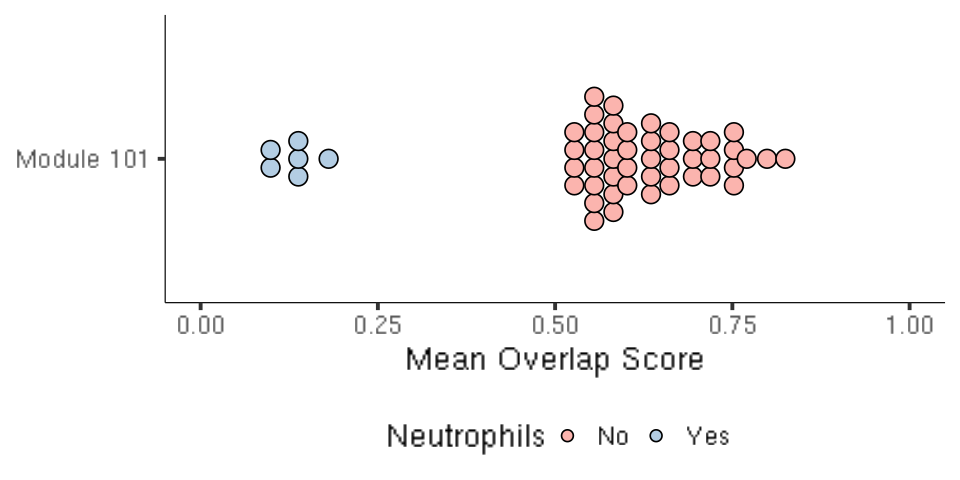

In [26]:
options(repr.plot.width=8, repr.plot.height=4)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs1131017") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score)) %>%
    dplyr::mutate(Neutrophils = c("No", "Yes")[as.numeric(grepl("Neutrophil", Group)) + 1])
    
plot.data %>%
    ggplot(aes(x="Module 101", y=Mean_Overlap_Score, fill=Neutrophils)) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.025) +
    scale_fill_brewer(palette="Pastel1") + 
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

ggsave("03_Functional_Interpretation/results/integration_module_101_goshifter.pdf", width=8, height=4)

VEP: 

In [27]:
vep %>%
    dplyr::filter(ID == "rs1131017") %>%
    dplyr::filter(Consequence == "TF_binding_site_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, TRANSCRIPTION_FACTORS)

CHROM,POS,ID,REF,ALT,Allele,Consequence,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
12,56042145,rs1131017,G,C,C,TF_binding_site_variant,ENSPFM0212,4,Y,0.000,GATA3&GATA5&GATA4
12,56042145,rs1131017,C,G,G,TF_binding_site_variant,ENSPFM0212,4,Y,-0.169,GATA3&GATA5&GATA4


## Module 103

In [30]:
modules %>%
    dplyr::filter(Module == "Module_103") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype)

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000090382,Module_103,12,LYZ,protein_coding
ENSG00000117242,Module_103,1,PINK1-AS,lncRNA
ENSG00000127337,Module_103,12,YEATS4,protein_coding
ENSG00000158445,Module_103,20,KCNB1,protein_coding
ENSG00000166900,Module_103,11,STX3,protein_coding
ENSG00000188895,Module_103,17,MSL1,protein_coding
ENSG00000257764,Module_103,12,AC020656.1,lncRNA
ENSG00000268618,Module_103,19,AC092316.1,lncRNA
ENSG00000271821,Module_103,6,AL662844.3,lncRNA


In [31]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_103_[0-9]-12", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>
ENSG00000090382,LYZ
ENSG00000127337,YEATS4
ENSG00000257764,AC020656.1
ENSG00000274979,AC020656.2


In [32]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [33]:
susie %>%
    dplyr::filter(grepl("ME_103_1-12", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_103_1-12:68275923-70376531,rs11177599,0.23951644,1,NA
ME_103_1-12:68275923-70376531,rs4761233,0.21005009,1,NA
ME_103_1-12:68275923-70376531,rs4761234,0.20778252,1,NA
ME_103_1-12:68275923-70376531,rs57954211,0.05419821,1,NA
ME_103_1-12:68275923-70376531,rs12819406,0.05096581,1,NA
ME_103_1-12:68275923-70376531,rs12370042,0.02803082,1,NA
ME_103_1-12:68275923-70376531,rs10878957,0.02579508,1,NA
ME_103_1-12:68275923-70376531,rs4274230,0.02579508,1,NA
ME_103_1-12:68275923-70376531,rs4761154,0.02579508,1,NA


In [34]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs4761234")

geno.bim %>%
    dplyr::filter(SNP == "rs4761234")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs4761234,ENSG00000090382,-0.44810367083151,0.0295631162600982,1.51410781354003e-44,1
rs4761234,ENSG00000274979,-0.274658772521897,0.0136118319028611,5.08860273133621e-70,1


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
12,rs4761234,0,69338325,C,T


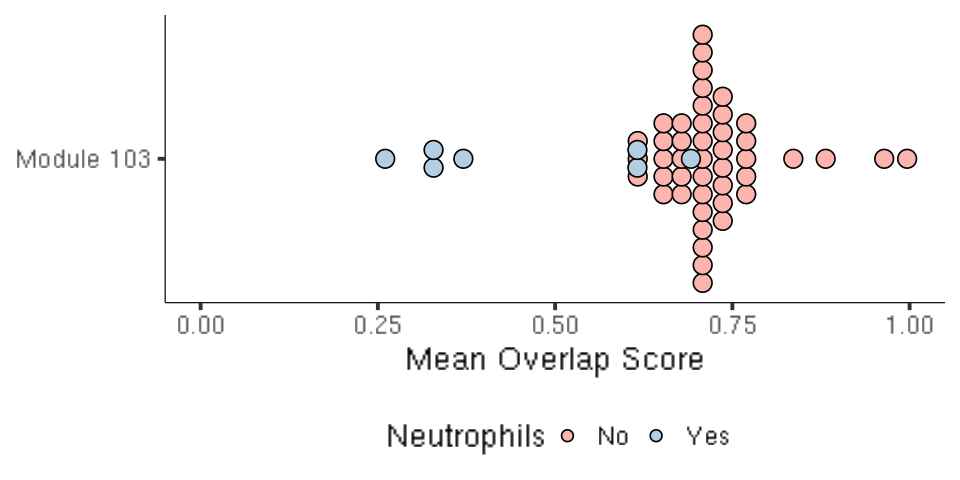

In [35]:
options(repr.plot.width=8, repr.plot.height=4)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs4761234") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score)) %>%
    dplyr::mutate(Neutrophils = c("No", "Yes")[as.numeric(grepl("Neutrophil", Group)) + 1])
    
plot.data %>%
    ggplot(aes(x="Module 103", y=Mean_Overlap_Score, fill=Neutrophils)) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.025) +
    scale_fill_brewer(palette="Pastel1") + 
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

In [36]:
vep %>%
    dplyr::filter(ID == "rs4761234") %>%
    dplyr::filter(Consequence == "TF_binding_site_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, TRANSCRIPTION_FACTORS)

CHROM,POS,ID,REF,ALT,Allele,Consequence,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
12,69338325,rs4761234,T,C,C,TF_binding_site_variant,ENSPFM0289,9,Y,-0.059,HNF4A
12,69338325,rs4761234,C,T,T,TF_binding_site_variant,ENSPFM0289,9,Y,0.000,HNF4A


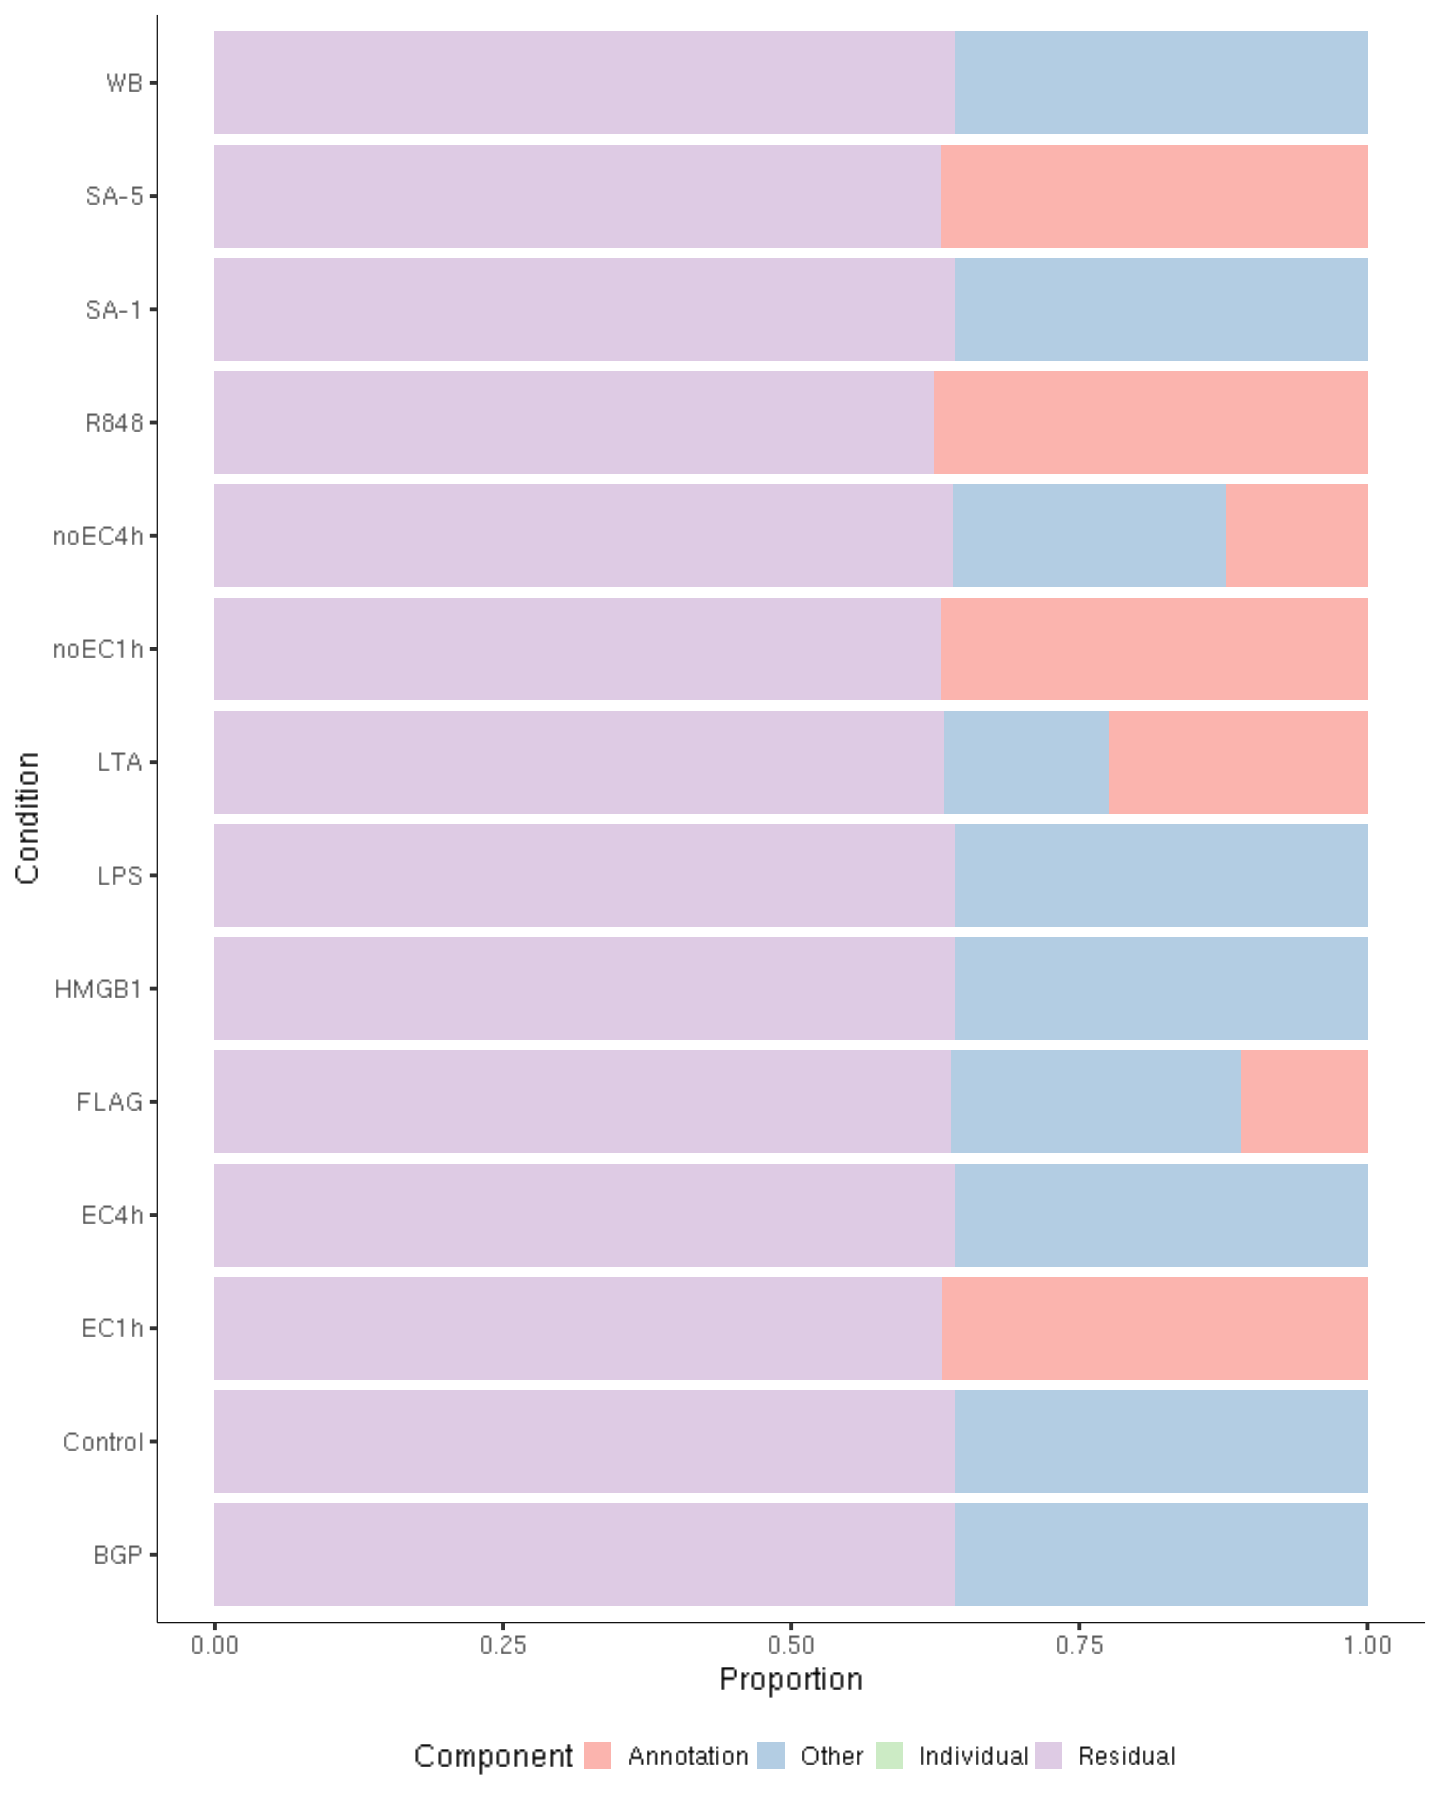

In [37]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_103_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Condition=gsub("Neutrophils-", "", Annotation))

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Condition, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    ggplot_theme

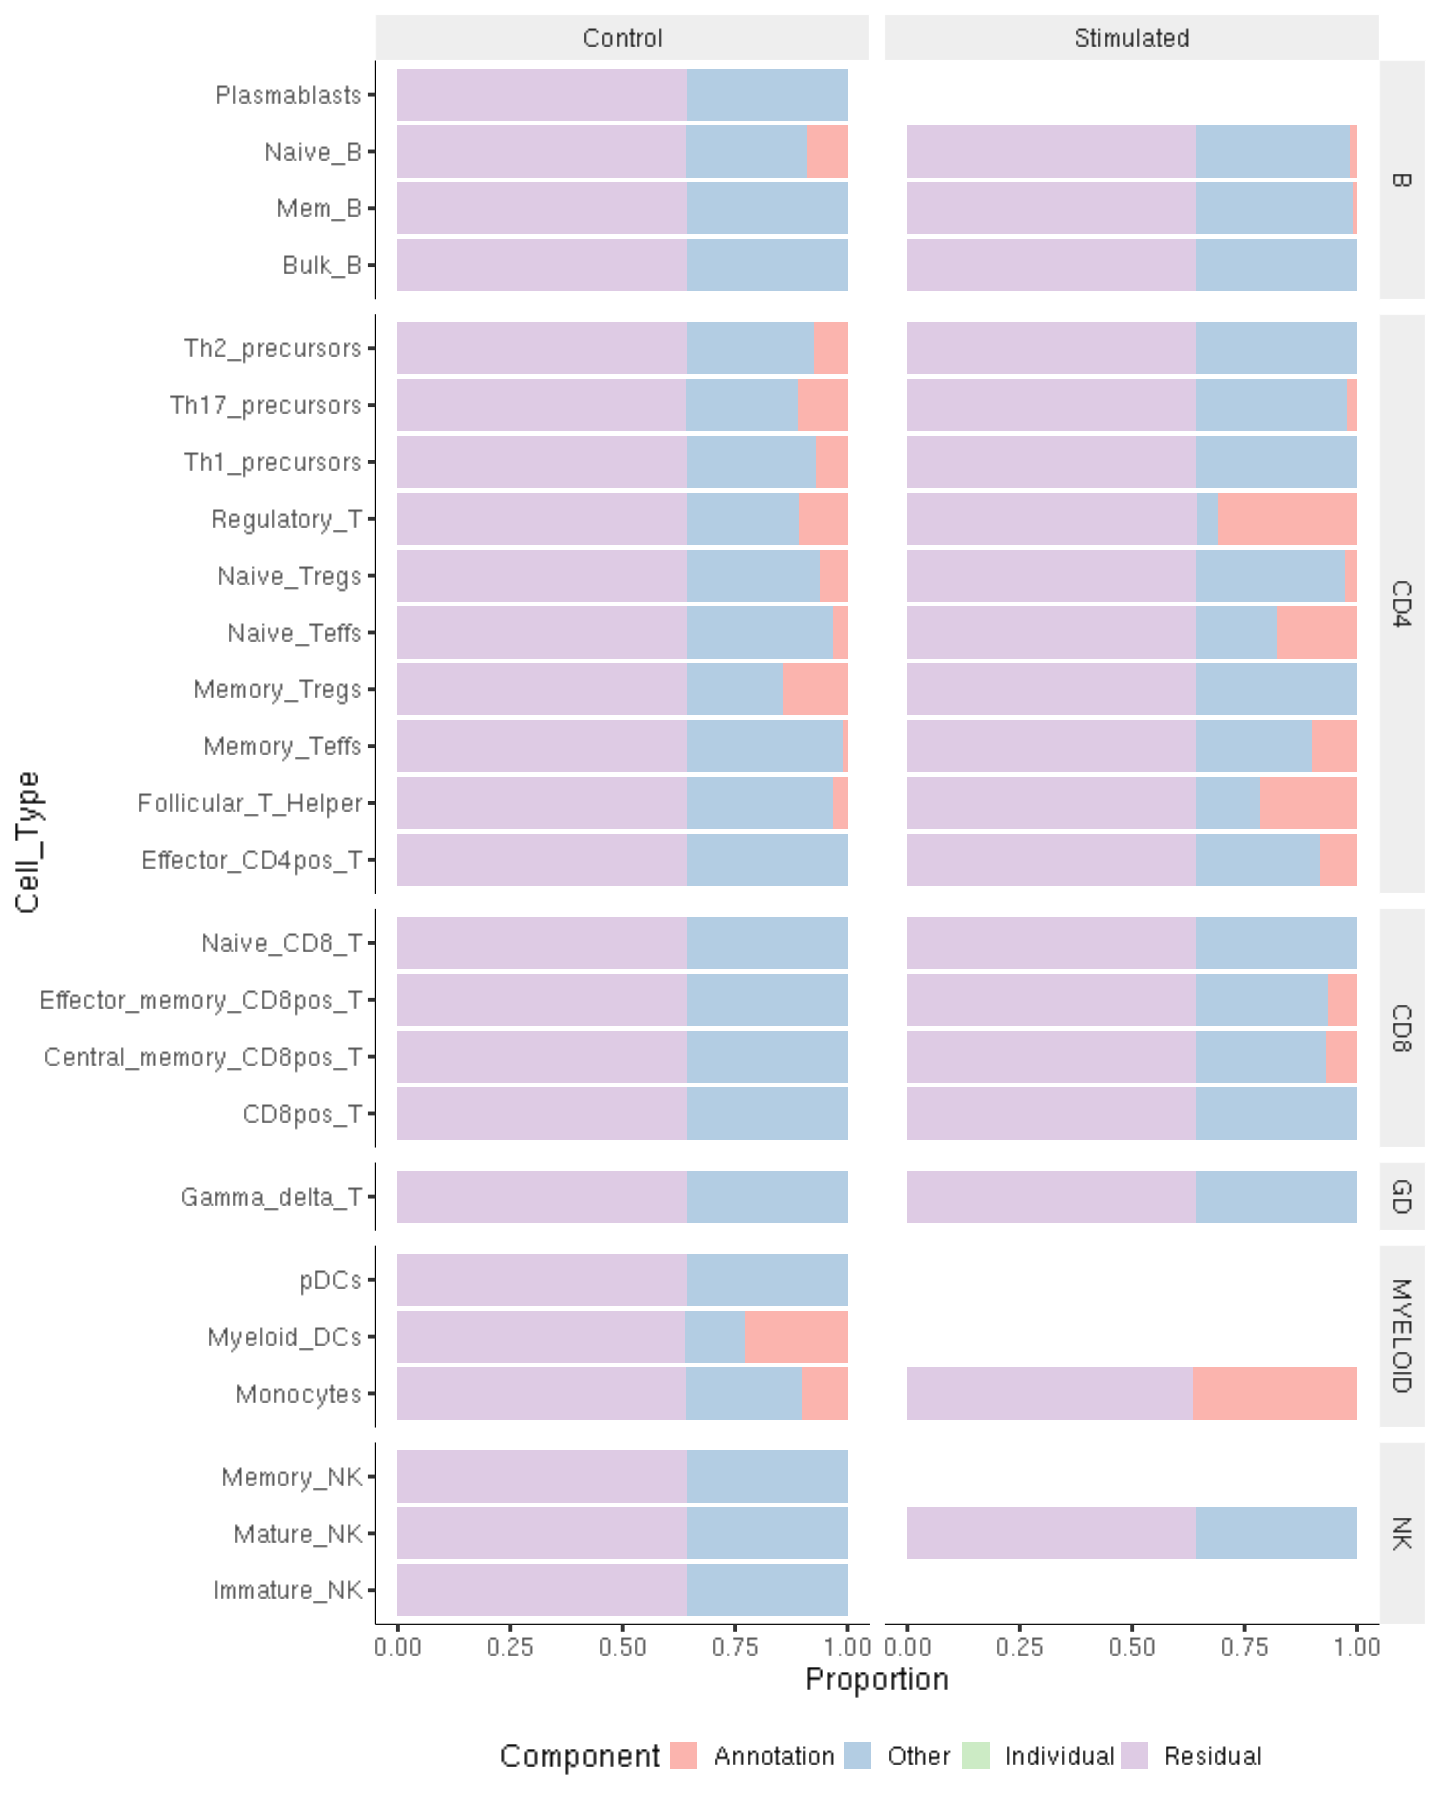

In [38]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_103_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(!grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", Annotation)) %>%
    dplyr::mutate(Condition=gsub("^.*-", "", Annotation)) %>%
    merge(., lineages, by="Cell_Type")

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Cell_Type, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Lineage ~ Condition, scale="free", space="free") +
    ggplot_theme

## Module 88

In [39]:
modules %>%
    dplyr::filter(Module == "Module_88") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype)

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000105668,Module_88,19,UPK1A,protein_coding
ENSG00000146556,Module_88,2,WASH2P,transcribed_unprocessed_pseudogene
ENSG00000165309,Module_88,10,ARMC3,protein_coding
ENSG00000175509,Module_88,2,AL078621.2,processed_pseudogene
ENSG00000182484,Module_88,X,WASH6P,transcribed_unprocessed_pseudogene
ENSG00000184319,Module_88,22,RPL23AP82,transcribed_unprocessed_pseudogene
ENSG00000227359,Module_88,2,AC017074.1,lncRNA
ENSG00000228857,Module_88,2,AC104653.1,lncRNA
ENSG00000236397,Module_88,2,DDX11L2,unprocessed_pseudogene


In [40]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_88_[0-9]-14", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>


In [41]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [42]:
susie %>%
    dplyr::filter(grepl("ME_88_5-14", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_88_5-14:64291924-66448148,rs2127870,0.61226567,1,NA
ME_88_5-14:64291924-66448148,rs11158588,0.21629616,1,NA
ME_88_5-14:64291924-66448148,rs9635249,0.12456752,1,NA
ME_88_5-14:64291924-66448148,rs28660318,0.30406418,2,NA
ME_88_5-14:64291924-66448148,rs59307701,0.30406418,2,NA
ME_88_5-14:64291924-66448148,rs74782623,0.06223113,2,NA
ME_88_5-14:64291924-66448148,rs74641092,0.06223113,2,NA
ME_88_5-14:64291924-66448148,rs28698923,0.04244736,2,NA
ME_88_5-14:64291924-66448148,rs77231001,0.04244736,2,NA


In [43]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs28660318")

geno.bim %>%
    dplyr::filter(SNP == "rs28660318")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs28660318,ENSG00000255002,-0.454490602330296,0.0357110064865666,2.69946866052341e-33,1


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
14,rs28660318,0,65216821,T,C


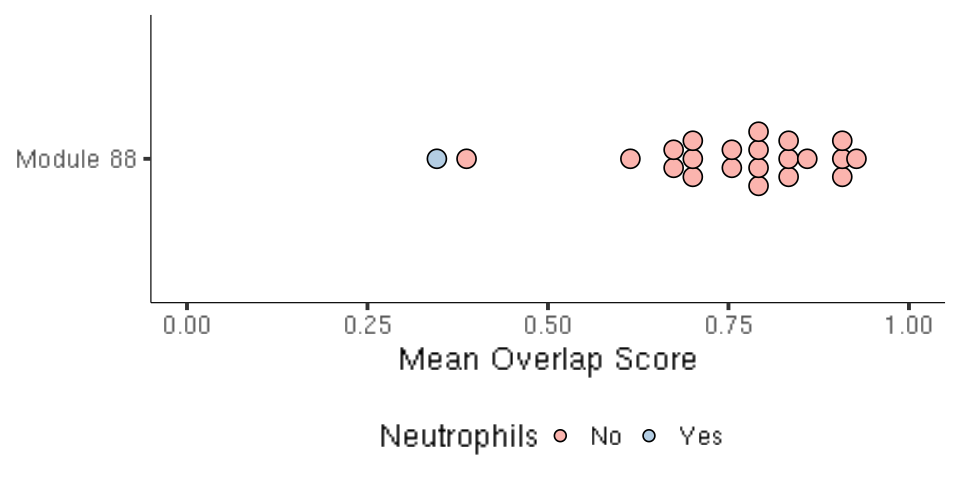

In [44]:
options(repr.plot.width=8, repr.plot.height=4)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs28660318") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score)) %>%
    dplyr::mutate(Neutrophils = c("No", "Yes")[as.numeric(grepl("Neutrophil", Group)) + 1])
    
plot.data %>%
    ggplot(aes(x="Module 88", y=Mean_Overlap_Score, fill=Neutrophils)) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.025) +
    scale_fill_brewer(palette="Pastel1") + 
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

In [45]:
vep %>%
    dplyr::filter(ID == "rs28660318") %>%
    dplyr::filter(Consequence == "TF_binding_site_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, TRANSCRIPTION_FACTORS)

CHROM,POS,ID,REF,ALT,Allele,Consequence,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>


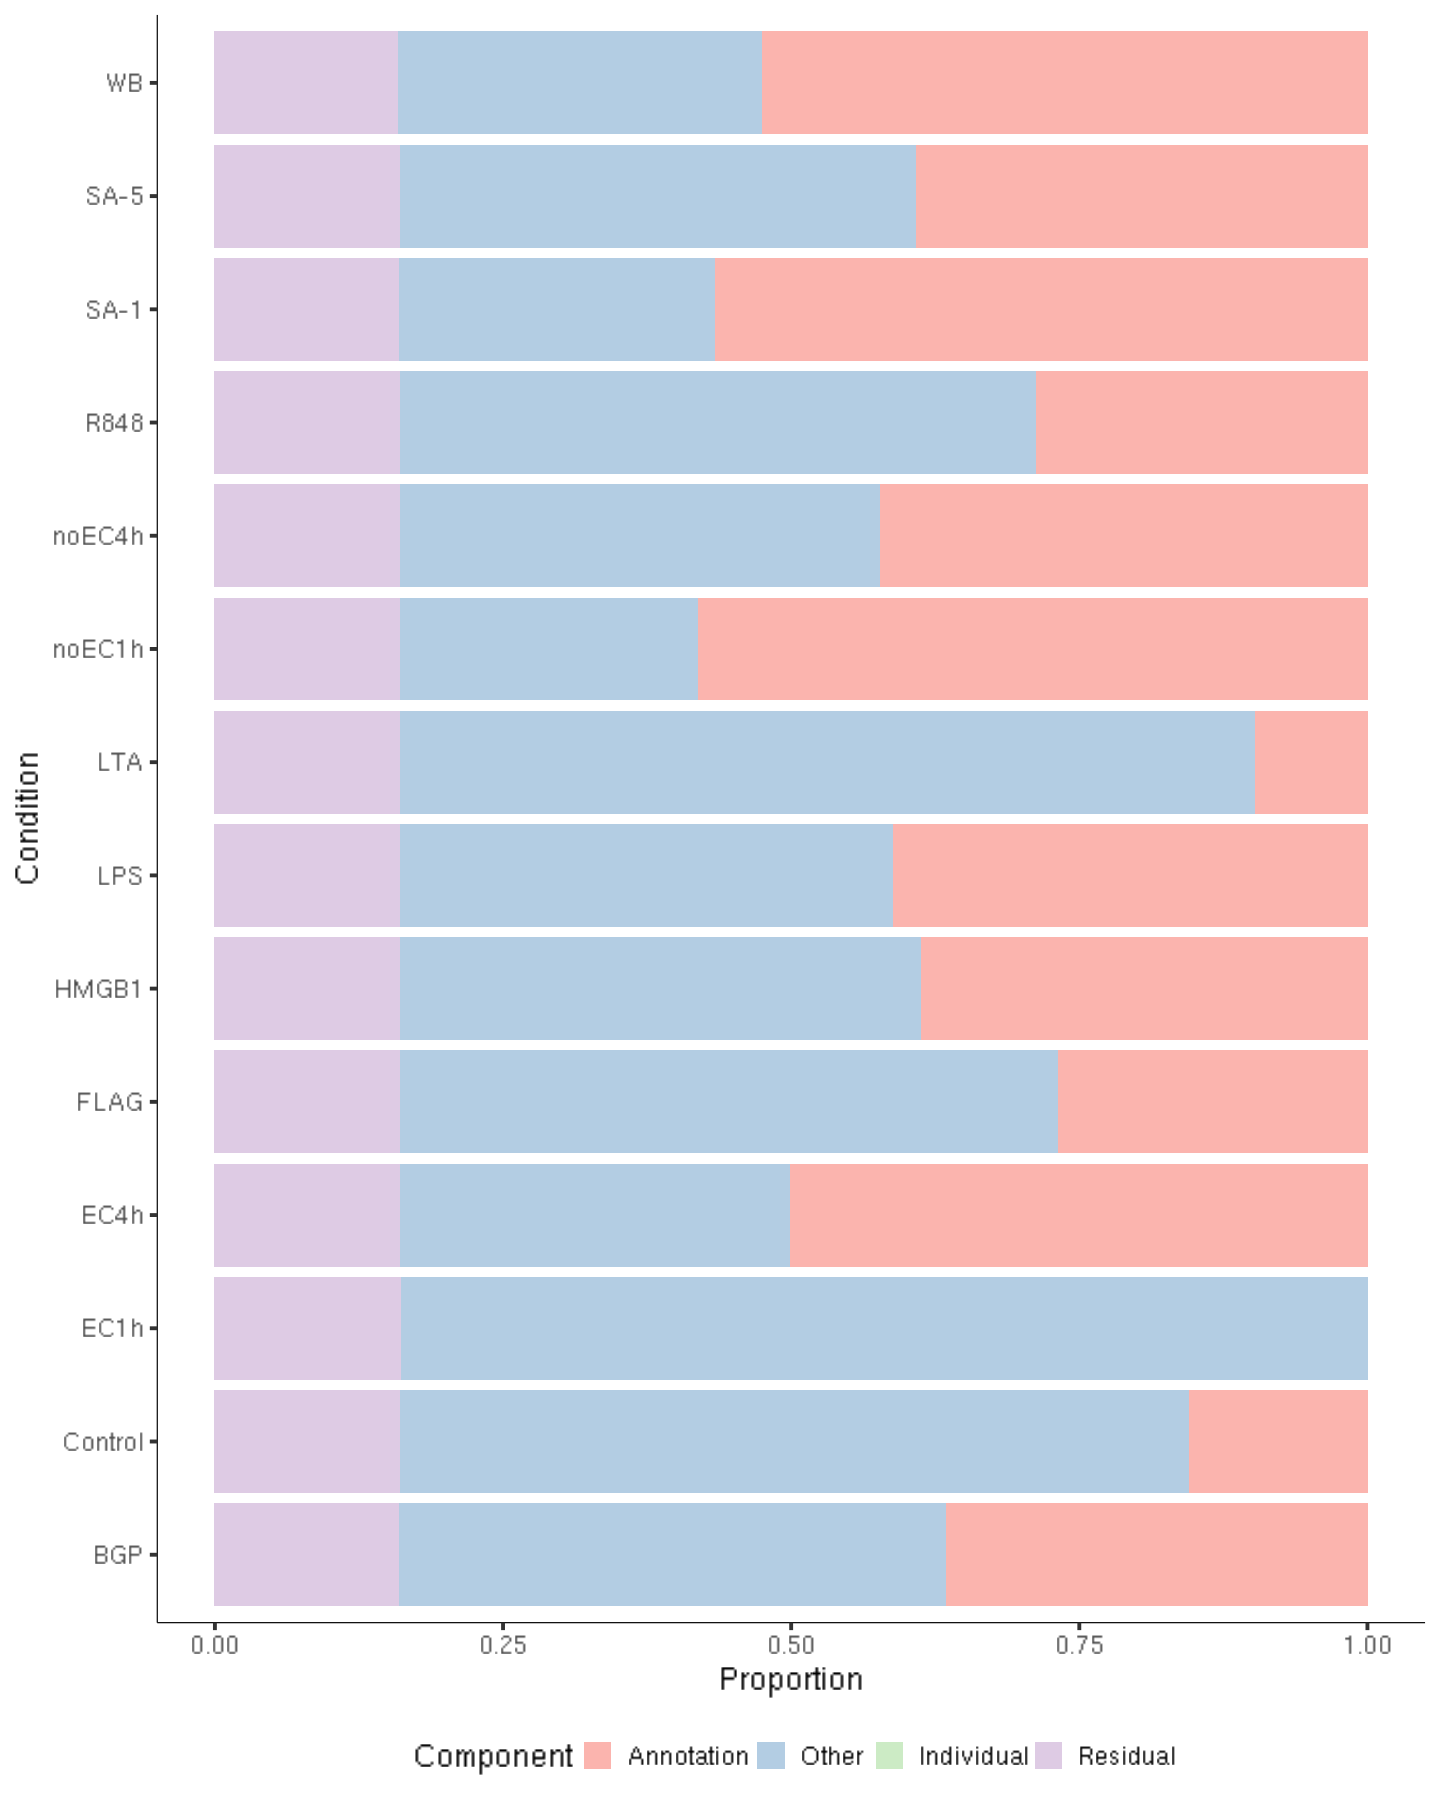

In [46]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_88_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Condition=gsub("Neutrophils-", "", Annotation))

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Condition, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    ggplot_theme

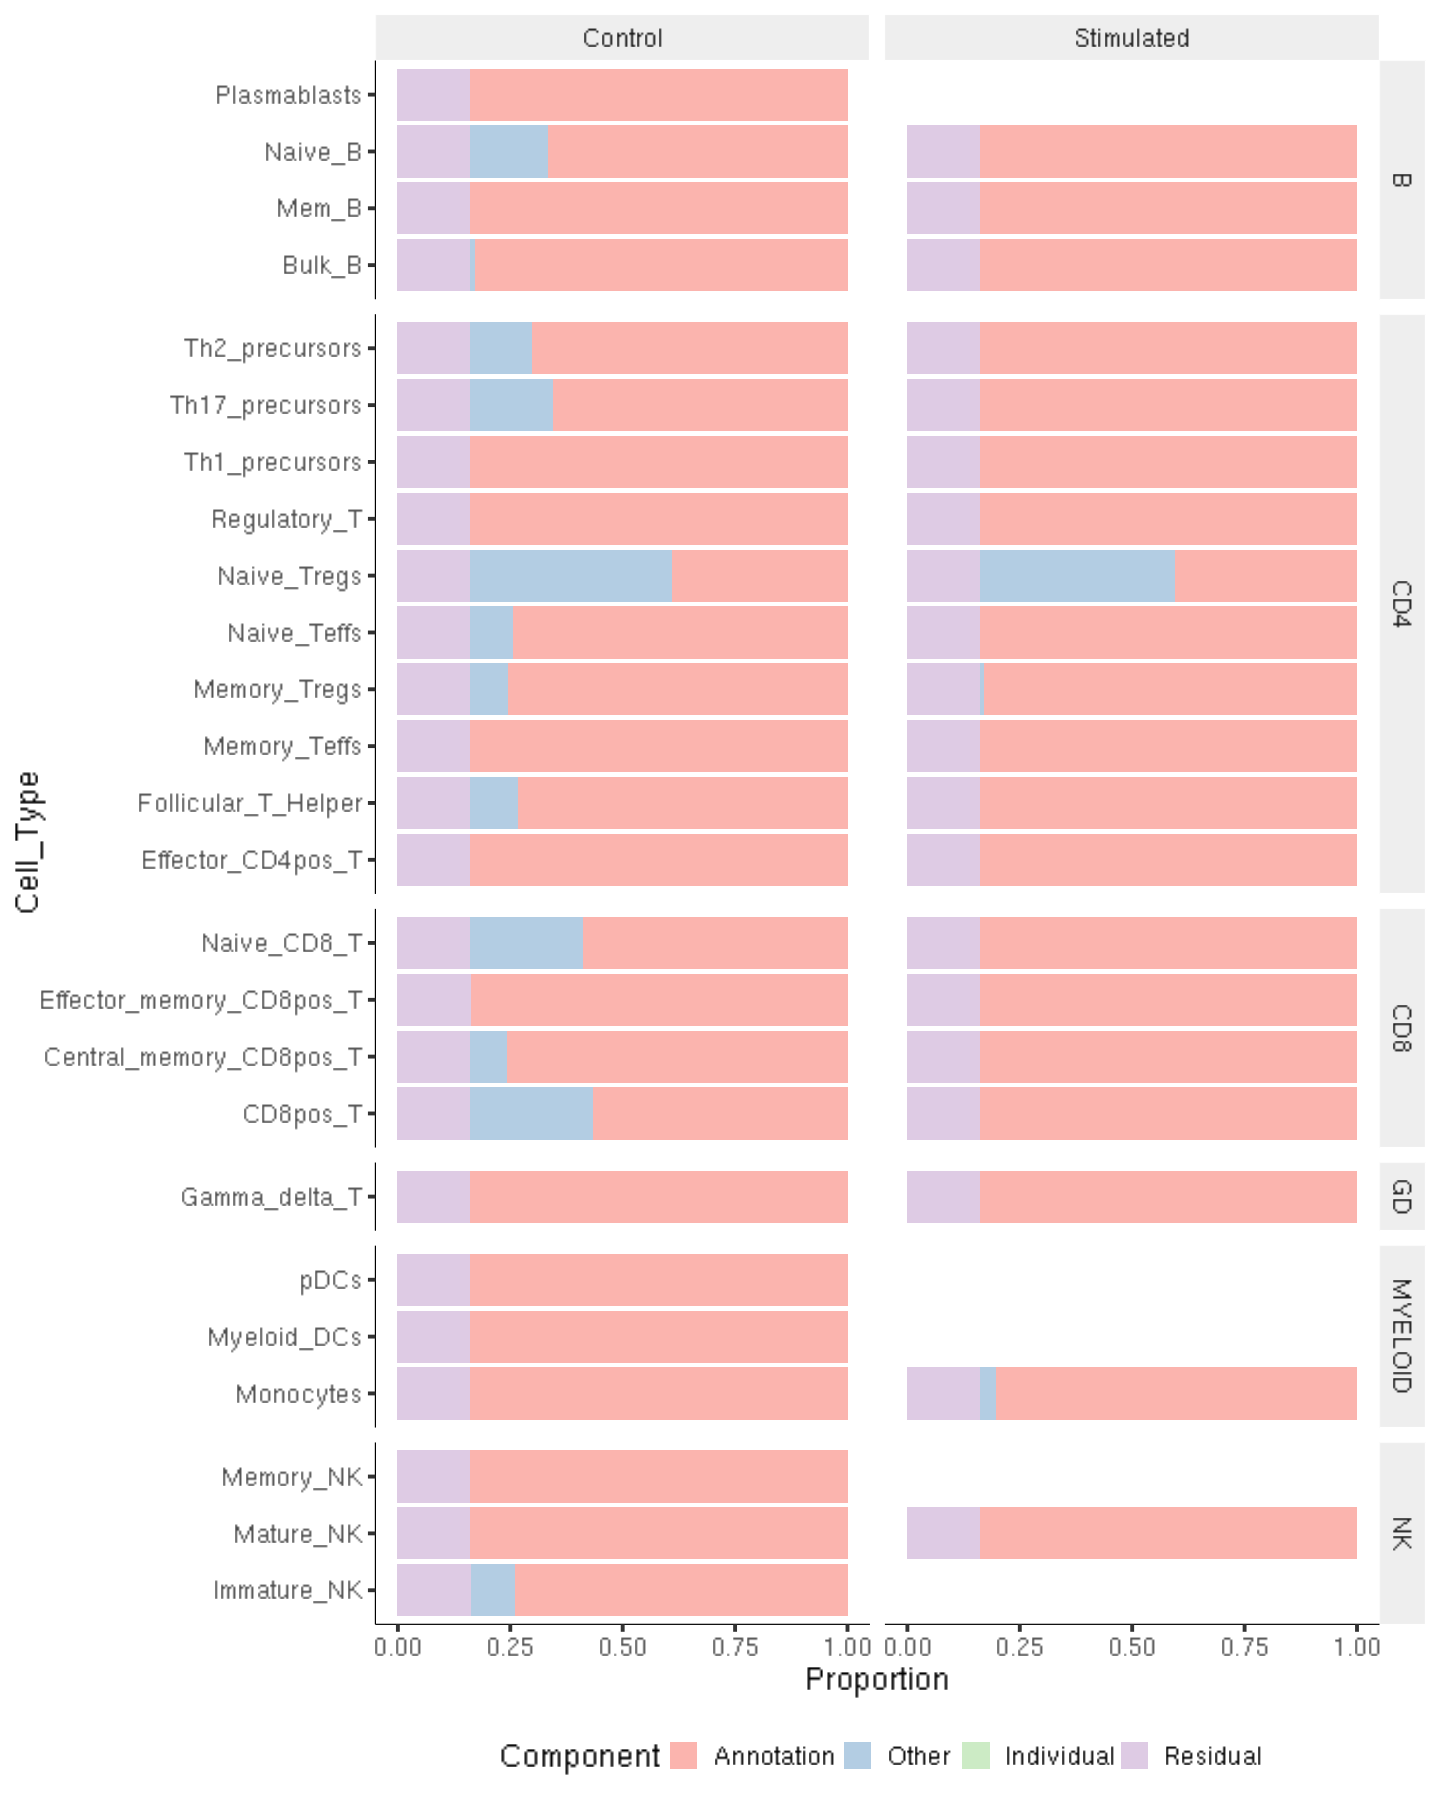

In [47]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_88_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(!grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", Annotation)) %>%
    dplyr::mutate(Condition=gsub("^.*-", "", Annotation)) %>%
    merge(., lineages, by="Cell_Type")

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Cell_Type, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Lineage ~ Condition, scale="free", space="free") +
    ggplot_theme

## Module 63

In [48]:
modules %>%
    dplyr::filter(Module == "Module_63") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype) %>%
    dplyr::filter(gene_biotype == "protein_coding") 

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000007062,Module_63,4,PROM1,protein_coding
ENSG00000067445,Module_63,X,TRO,protein_coding
ENSG00000088305,Module_63,20,DNMT3B,protein_coding
ENSG00000088882,Module_63,20,CPXM1,protein_coding
ENSG00000101200,Module_63,20,AVP,protein_coding
ENSG00000112414,Module_63,6,ADGRG6,protein_coding
ENSG00000113389,Module_63,5,NPR3,protein_coding
ENSG00000113657,Module_63,5,DPYSL3,protein_coding
ENSG00000117400,Module_63,1,MPL,protein_coding


In [49]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_63_[0-9]-11", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>
ENSG00000030066,NUP160


In [50]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [51]:
susie %>%
    dplyr::filter(grepl("ME_63_4-11", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_63_4-11:46459981-48629440,rs7950696,0.069972553,1,NA
ME_63_4-11:46459981-48629440,rs10838732,0.054876904,1,NA
ME_63_4-11:46459981-48629440,rs6485763,0.054876904,1,NA
ME_63_4-11:46459981-48629440,rs7945312,0.054876904,1,NA
ME_63_4-11:46459981-48629440,rs10742814,0.047934393,1,NA
ME_63_4-11:46459981-48629440,rs2203712,0.045260714,1,NA
ME_63_4-11:46459981-48629440,rs11039280,0.045260714,1,NA
ME_63_4-11:46459981-48629440,rs12226590,0.045260714,1,NA
ME_63_4-11:46459981-48629440,rs2242081,0.042726491,1,NA


In [52]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs7950696")

geno.bim %>%
    dplyr::filter(SNP == "rs7950696")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs7950696,ENSG00000030066,0.0350849853231444,0.00764587150090268,5.49093434580727e-06,1


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
11,rs7950696,0,47459981,C,T


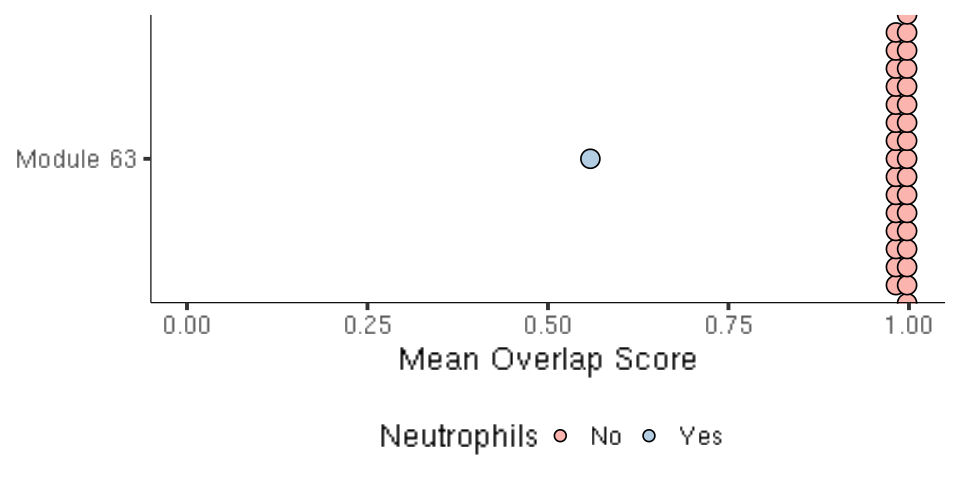

In [53]:
options(repr.plot.width=8, repr.plot.height=4)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs7950696") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score)) %>%
    dplyr::mutate(Neutrophils = c("No", "Yes")[as.numeric(grepl("Neutrophil", Group)) + 1])
    
plot.data %>%
    ggplot(aes(x="Module 63", y=Mean_Overlap_Score, fill=Neutrophils)) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.025) +
    scale_fill_brewer(palette="Pastel1") + 
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

In [54]:
vep %>%
    dplyr::filter(ID == "rs7950696") %>%
    dplyr::filter(Consequence == "TF_binding_site_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, TRANSCRIPTION_FACTORS)

CHROM,POS,ID,REF,ALT,Allele,Consequence,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>


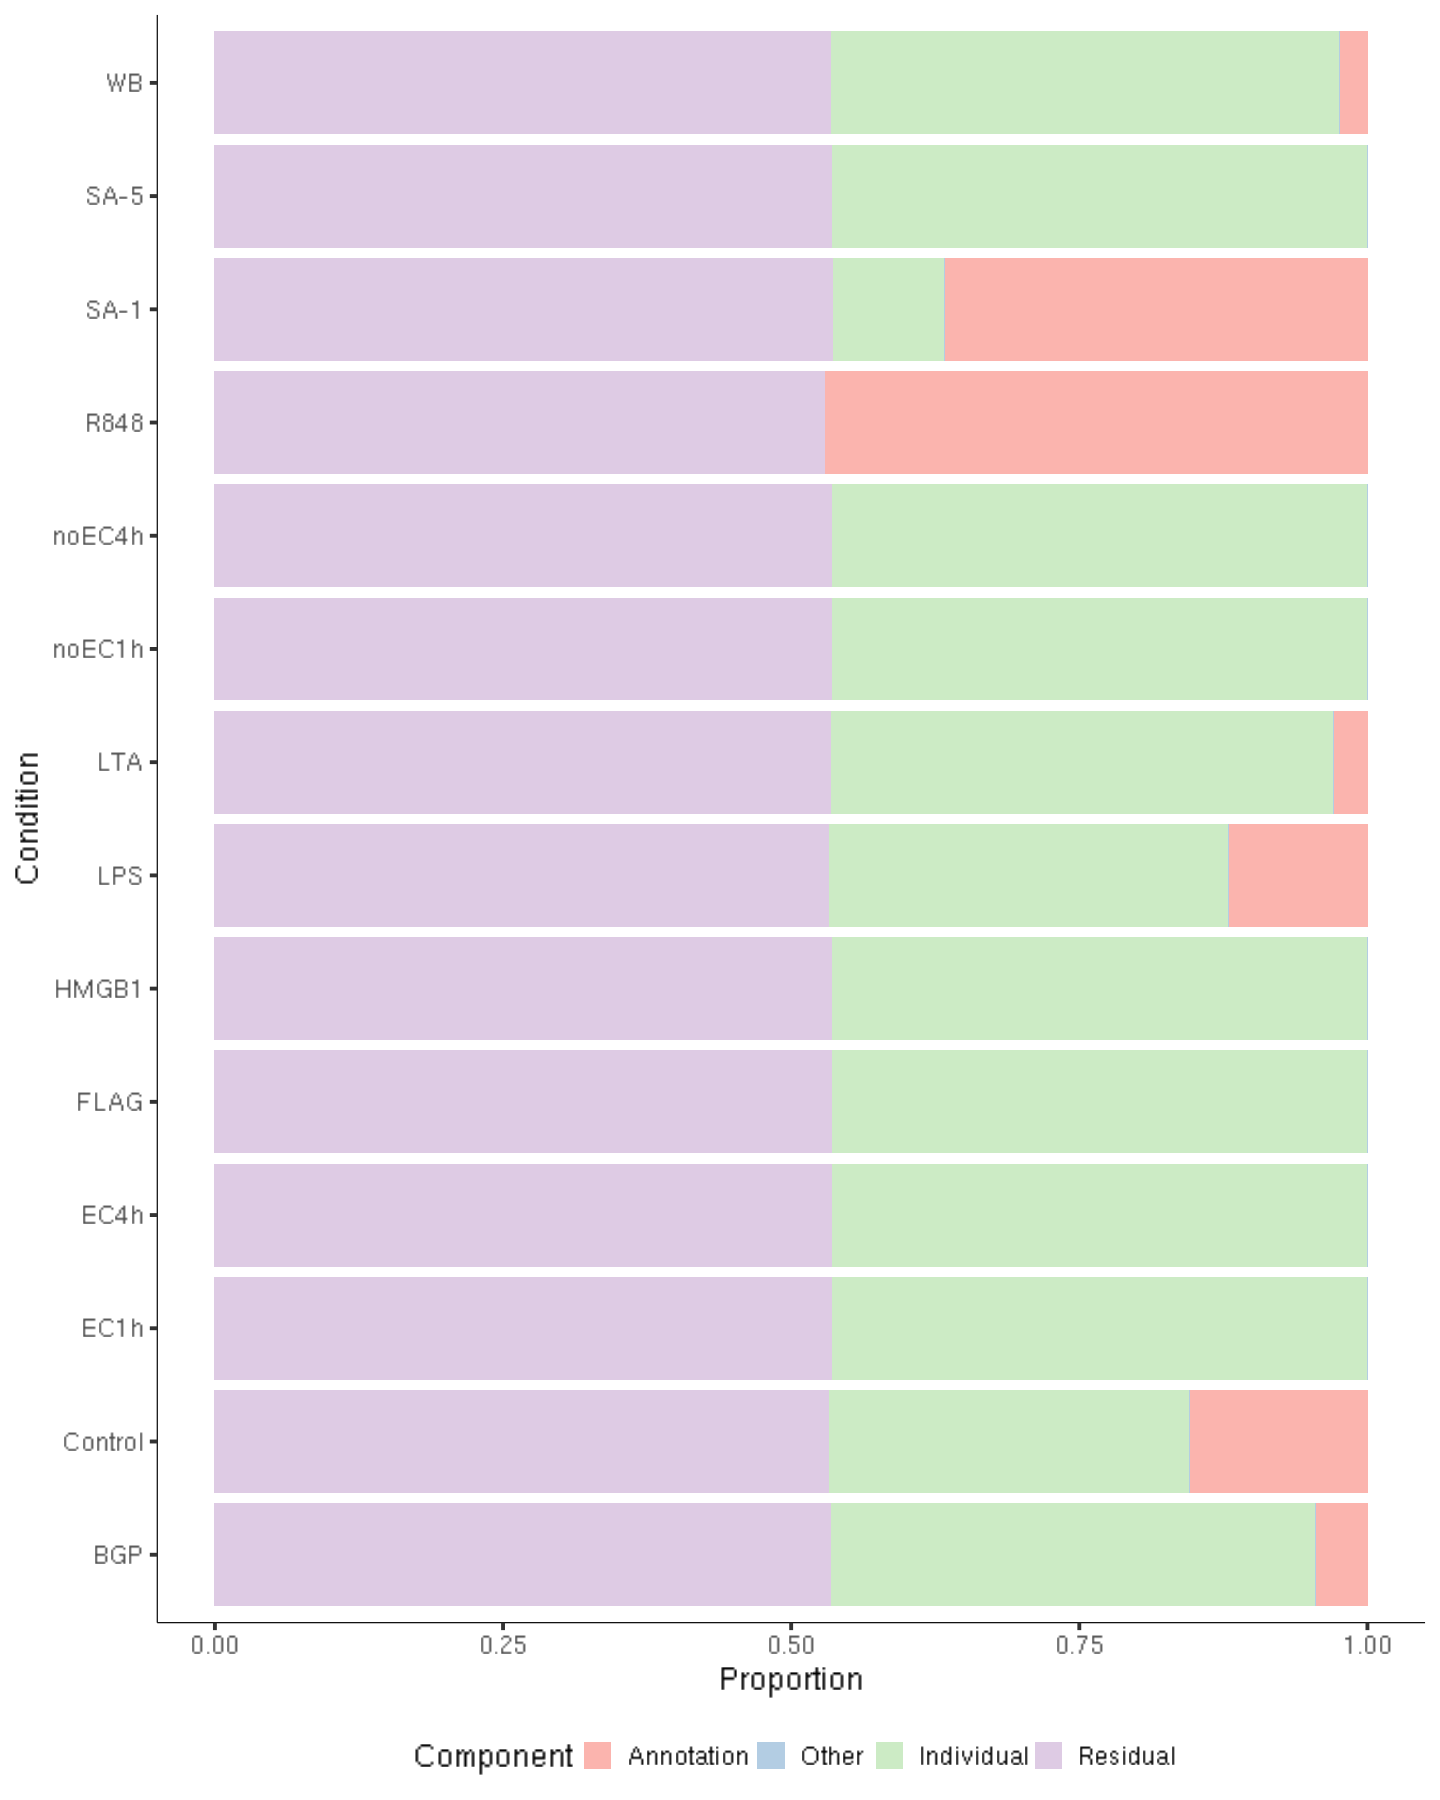

In [55]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_63_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Condition=gsub("Neutrophils-", "", Annotation))

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Condition, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    ggplot_theme

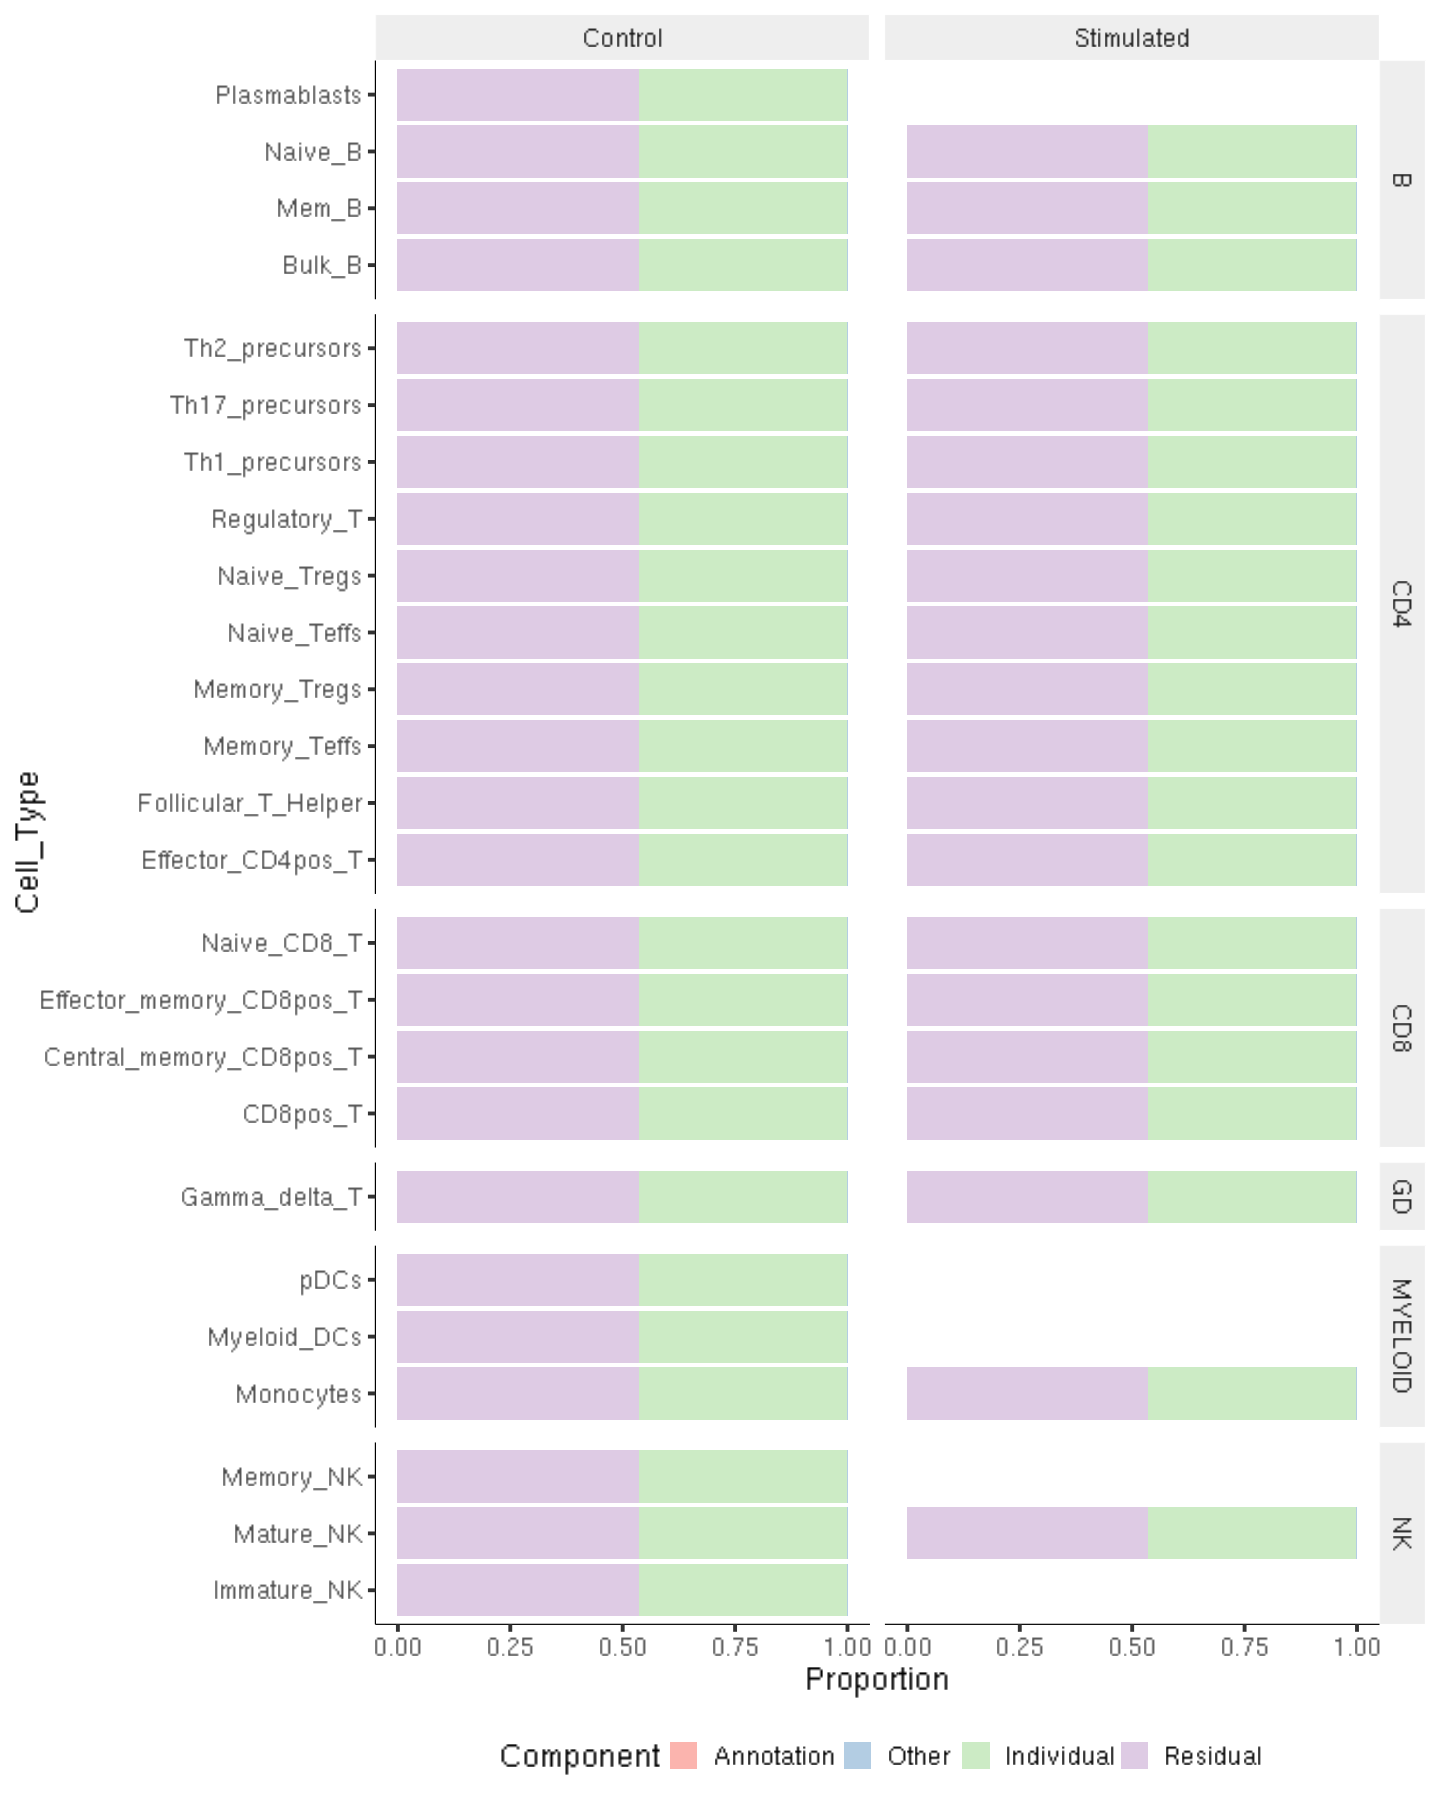

In [56]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_63_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(!grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", Annotation)) %>%
    dplyr::mutate(Condition=gsub("^.*-", "", Annotation)) %>%
    merge(., lineages, by="Cell_Type")

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Cell_Type, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Lineage ~ Condition, scale="free", space="free") +
    ggplot_theme

## Module 51

In [57]:
modules %>%
    dplyr::filter(Module == "Module_51") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype) %>%
    dplyr::filter(gene_biotype == "protein_coding") 

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000006831,Module_51,12,ADIPOR2,protein_coding
ENSG00000054611,Module_51,22,TBC1D22A,protein_coding
ENSG00000067225,Module_51,15,PKM,protein_coding
ENSG00000070759,Module_51,1,TESK2,protein_coding
ENSG00000074800,Module_51,1,ENO1,protein_coding
ENSG00000099849,Module_51,11,RASSF7,protein_coding
ENSG00000100281,Module_51,22,HMGXB4,protein_coding
ENSG00000100644,Module_51,14,HIF1A,protein_coding
ENSG00000101216,Module_51,20,GMEB2,protein_coding


In [58]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_51_[0-9]", Module.QTL)) %>%
    head()

,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,Gene,eQTL.Signal,Eigengene,Module.QTL,Coloc.Factor
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
1,3068,2.469761e-70,1.451496e-13,6.769304e-59,0.03882250,0.9611775,ENSG00000163293,1,ME_51_2,ME_51_2-4:46822874-48948369,0.9611775
2,3155,3.428261e-118,1.509323e-13,9.396431e-107,0.04040904,0.9595910,ENSG00000259959,1,ME_51_2,ME_51_2-4:46822874-48948369,0.9595910
3,3066,5.827727e-200,1.550697e-13,1.597307e-188,0.04154419,0.9584558,ENSG00000170448,1,ME_51_2,ME_51_2-4:46822874-48948369,0.9584558
4,3151,1.531359e-73,1.608272e-13,4.197262e-62,0.04312384,0.9568762,ENSG00000145244,1,ME_51_2,ME_51_2-4:46822874-48948369,0.9568762
5,2864,8.152179e-23,1.616533e-13,2.234410e-11,0.04335049,0.9566495,ENSG00000169019,2,ME_51_2,ME_51_2-4:46822874-48948369,0.9566495
6,2896,2.990630e-26,1.638223e-13,8.196939e-15,0.04394558,0.9560544,ENSG00000145246,2,ME_51_2,ME_51_2-4:46822874-48948369,0.9560544


In [59]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_51_[0-9]", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>
ENSG00000135605,TEC
ENSG00000145244,CORIN
ENSG00000145246,ATP10D
ENSG00000163293,NIPAL1
ENSG00000169019,COMMD8
ENSG00000170448,NFXL1
ENSG00000259959,AC107068.1


In [60]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [61]:
susie %>%
    dplyr::filter(grepl("ME_51_2", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_51_2-4:46822874-48948369,rs6811177,0.05341723,1,NA
ME_51_2-4:46822874-48948369,rs6447587,0.03871439,1,NA
ME_51_2-4:46822874-48948369,rs12651301,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs9994561,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs1822030,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs28395298,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs28636596,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs28460483,0.03070206,1,NA
ME_51_2-4:46822874-48948369,rs1371729,0.02915220,1,NA


In [62]:
c.cis.eqtl %>%
    dplyr::filter(Gene == "ENSG00000169019")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs7436716,ENSG00000169019,-0.11594590847671,0.0112144731179699,2.97895467179934e-23,1
rs1371729,ENSG00000169019,0.0833905506387308,0.0102168028026016,2.55481202687362e-15,2
rs34096542,ENSG00000169019,-0.0869803922817651,0.0174472681909221,7.57908736096564e-07,3


In [63]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs1371729")

geno.bim %>%
    dplyr::filter(SNP == "rs1371729")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs1371729,ENSG00000169019,0.0833905506387308,0.0102168028026016,2.55481202687362e-15,2


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
4,rs1371729,0,47948370,G,A


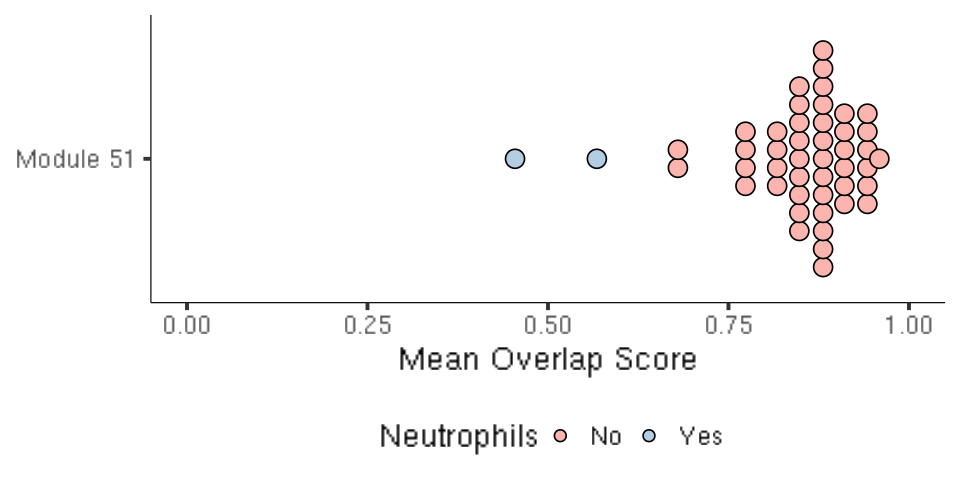

In [64]:
options(repr.plot.width=8, repr.plot.height=4)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs1371729") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score)) %>%
    dplyr::mutate(Neutrophils = c("No", "Yes")[as.numeric(grepl("Neutrophil", Group)) + 1])
    
plot.data %>%
    ggplot(aes(x="Module 51", y=Mean_Overlap_Score, fill=Neutrophils)) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.025) +
    scale_fill_brewer(palette="Pastel1") + 
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

In [65]:
vep %>%
    dplyr::filter(ID == "rs1371729") %>%
    dplyr::filter(Consequence == "TF_binding_site_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, TRANSCRIPTION_FACTORS)

CHROM,POS,ID,REF,ALT,Allele,Consequence,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>


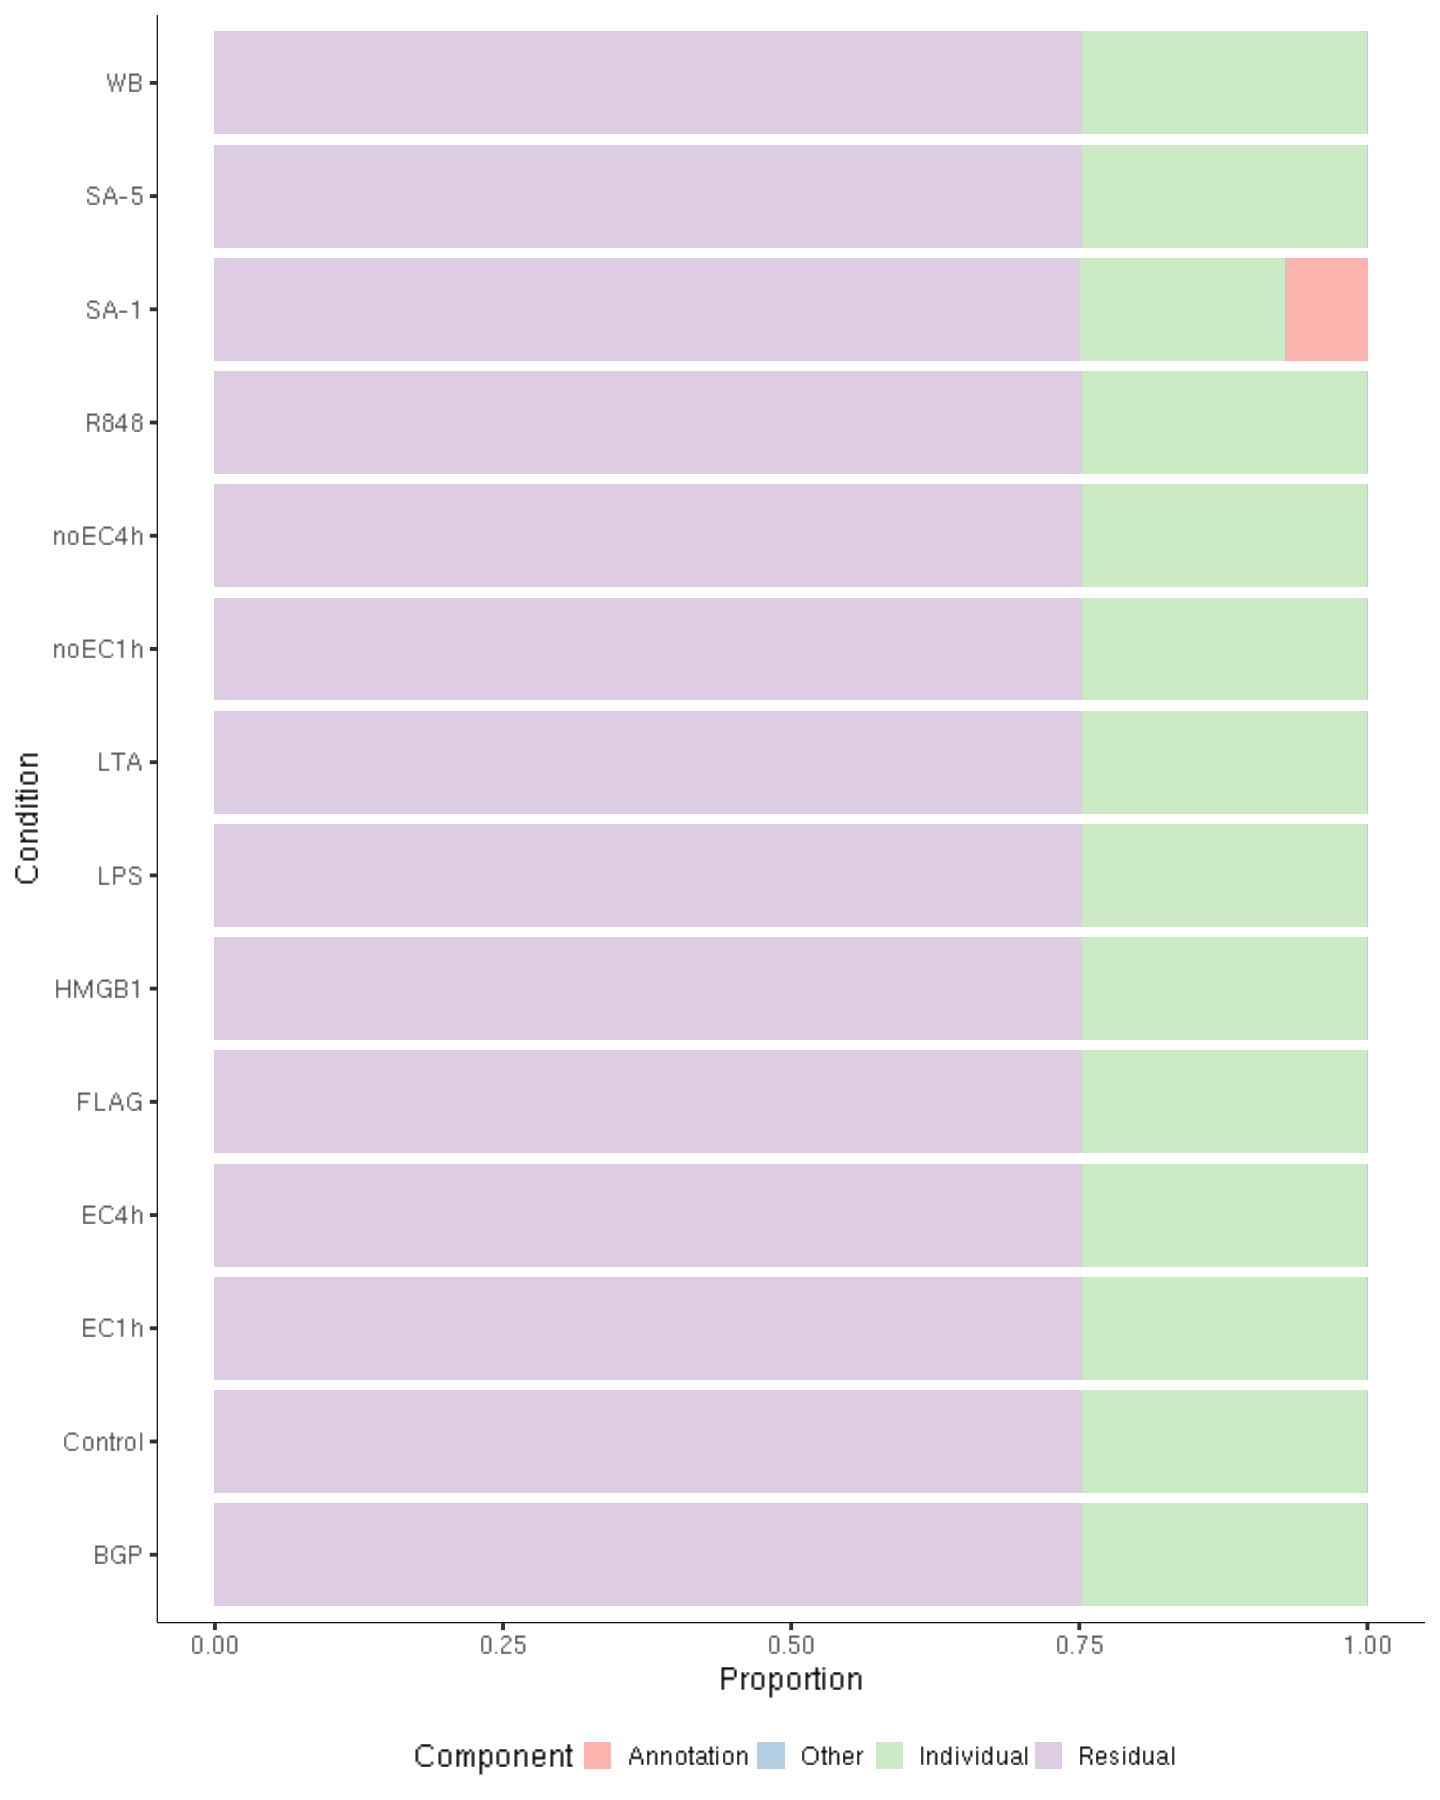

In [66]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_51_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Condition=gsub("Neutrophils-", "", Annotation))

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Condition, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    ggplot_theme

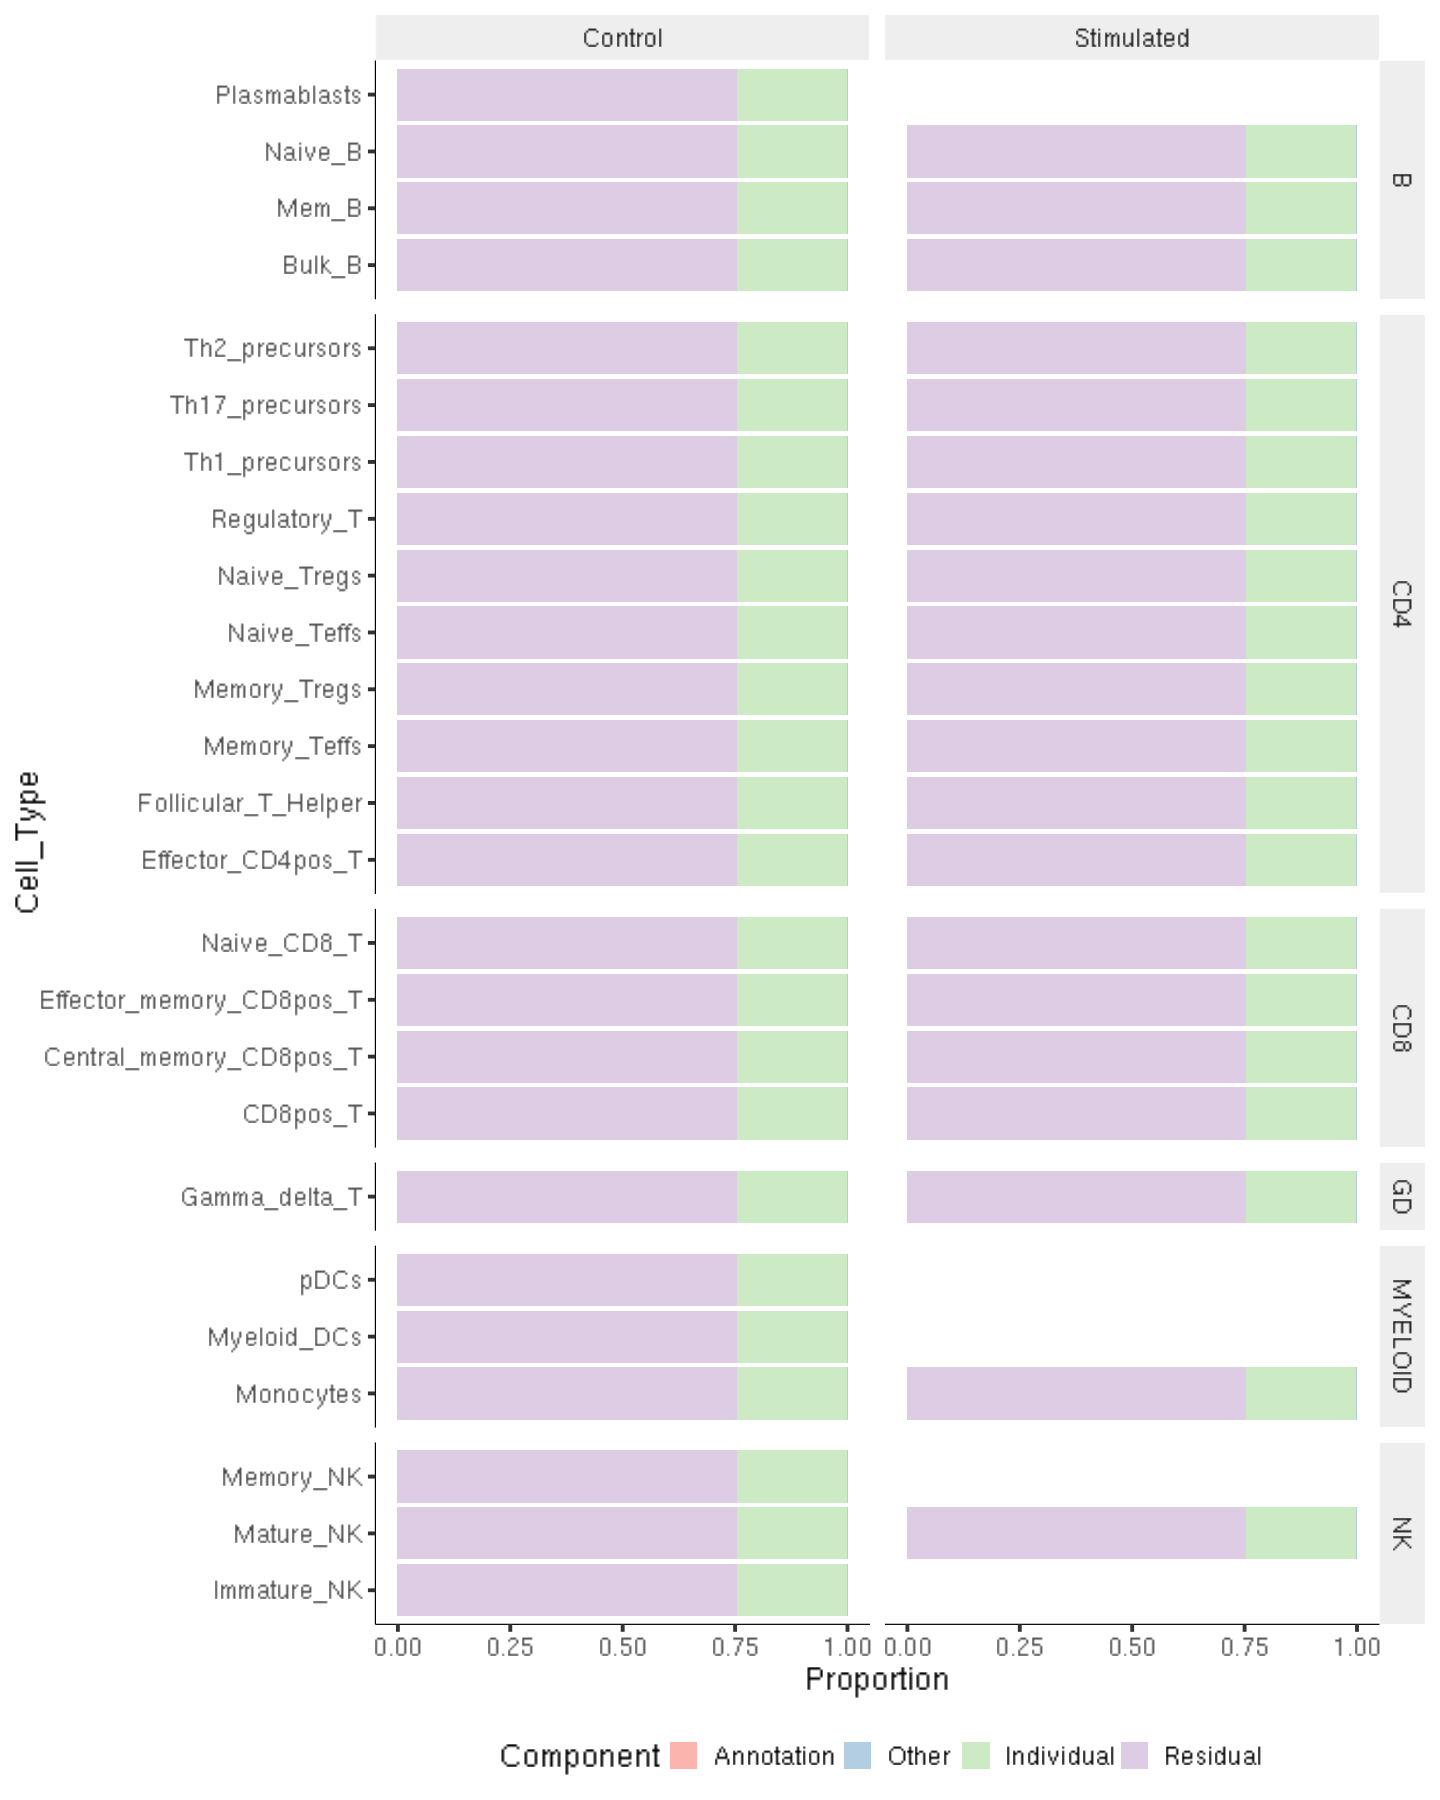

In [67]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_51_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(!grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", Annotation)) %>%
    dplyr::mutate(Condition=gsub("^.*-", "", Annotation)) %>%
    merge(., lineages, by="Cell_Type")

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Cell_Type, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Lineage ~ Condition, scale="free", space="free") +
    ggplot_theme

## Module 92

Nice module as an example - butyrophilins and MHC class I molecules.

In [68]:
modules %>%
    dplyr::filter(Module == "Module_92") %>%
    dplyr::select(Gene, Module, seqnames, gene_name, gene_biotype) %>%
    dplyr::filter(gene_biotype == "protein_coding") 

Gene,Module,seqnames,gene_name,gene_biotype
<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000026950,Module_92,6,BTN3A1,protein_coding
ENSG00000111801,Module_92,6,BTN3A3,protein_coding
ENSG00000112763,Module_92,6,BTN2A1,protein_coding
ENSG00000124508,Module_92,6,BTN2A2,protein_coding
ENSG00000140853,Module_92,16,NLRC5,protein_coding
ENSG00000166710,Module_92,15,B2M,protein_coding
ENSG00000186470,Module_92,6,BTN3A2,protein_coding
ENSG00000204525,Module_92,6,HLA-C,protein_coding
ENSG00000204592,Module_92,6,HLA-E,protein_coding


Colocalisation with:
1. NLRC5 - interesting, only one on chr 16 other than the lncRNA
2. BTN3A2
3. HLA-C
4. HCG11

In [73]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_92_[0-9]", Module.QTL))

nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,Gene,eQTL.Signal,Eigengene,Module.QTL,Coloc.Factor
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
2720,3.892711e-161,1.748027e-111,2.226917e-53,0.000000e+00,1.0000000,ENSG00000140853,1,ME_92_3,ME_92_3-16:56024670-58024669,1.0000000
2761,1.284284e-194,1.748027e-111,7.347051e-87,0.000000e+00,1.0000000,ENSG00000259922,1,ME_92_3,ME_92_3-16:56024670-58024669,1.0000000
2720,3.827403e-74,1.718700e-24,2.226920e-53,1.096923e-09,1.0000000,ENSG00000140853,1,ME_92_5,ME_92_5-16:56024670-58024669,1.0000000
2761,1.262738e-107,1.718700e-24,7.347059e-87,1.096923e-09,1.0000000,ENSG00000259922,1,ME_92_5,ME_92_5-16:56024670-58024669,1.0000000
12469,3.621524e-60,1.327830e-19,1.356337e-44,1.949591e-06,0.9999981,ENSG00000204525,1,ME_92_2,ME_92_2-6:29991224-32464002,0.9999981
2720,2.335427e-68,1.048726e-18,2.335218e-53,4.868152e-05,0.9999513,ENSG00000140853,1,ME_92_1,ME_92_1-16:56024670-58024669,0.9999513
2761,7.705046e-102,1.048726e-18,7.704359e-87,4.868152e-05,0.9999513,ENSG00000259922,1,ME_92_1,ME_92_1-16:56024670-58024669,0.9999513
4737,4.609604e-11,9.536110e-07,2.608432e-07,4.400591e-03,0.9955982,ENSG00000228223,1,ME_92_4,ME_92_4-6:25175638-28307054,0.9955994
4626,1.071670e-192,9.092253e-11,7.077794e-184,5.910848e-02,0.9408915,ENSG00000186470,1,ME_92_5,ME_92_5-6:25175638-28307054,0.9408915


In [70]:
coloc.eqtl.mqtl %>%
    dplyr::filter(grepl("ME_92_[0-9]", Module.QTL)) %>%
    dplyr::count(Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::select(Gene, gene_name)

Gene,gene_name
<chr>,<chr>
ENSG00000140853,NLRC5
ENSG00000186470,BTN3A2
ENSG00000204525,HLA-C
ENSG00000228223,HCG11
ENSG00000259922,AC023825.1


Take ME_92_1 as an example:
1. CS 1 for rs821470
2. CS 2 for rs12373120

In [74]:
susie <- fread("~/gains_team282/nikhil/colocalization/mqtl/fine_mapping/SuSiE/module_qtl_credible_sets.tsv")

In [75]:
susie %>%
    dplyr::filter(grepl("ME_92_1-16", Gene))

Gene,SNP,SNP_Prob,Credible_Set,Notes
<chr>,<chr>,<dbl>,<int>,<chr>
ME_92_1-16:56024670-58024669,rs821470,0.9902365,1,NA
ME_92_1-16:56024670-58024669,rs12373120,0.9895280,2,NA


In [78]:
c.cis.eqtl %>%
    dplyr::filter(SNP == "rs821470")

geno.bim %>%
    dplyr::filter(SNP == "rs821470")

SNP,Gene,eQTL_beta,eQTL_SE,pvalue,Number
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs821470,ENSG00000140853,0.292067732490055,0.0179967419145994,1.91167944970489e-49,1
rs821470,ENSG00000259922,0.231214169552342,0.0111092443180736,3.05440261515983e-73,1


Chr,SNP,cM,Pos,Minor,Major
<chr>,<chr>,<int>,<int>,<chr>,<chr>
16,rs821470,0,57024670,G,A


In [80]:
loci %>%
    dplyr::filter(SNP == "rs821470") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score))

Group,Mean_Overlap_Score
<chr>,<dbl>
Effector_memory_CD8pos_T-Control,0.5054505
Immature_NK-Control,0.9625963
Memory_Teffs-Control,0.5094509
Regulatory_T-Control,0.3865387
Th17_precursors-Control,0.6851685


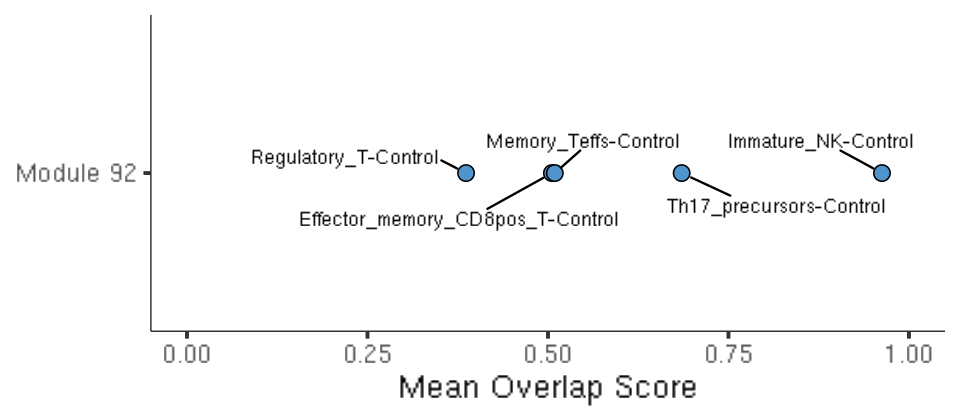

In [99]:
options(repr.plot.width=8, repr.plot.height=3.5)

plot.data <- loci %>%
    dplyr::filter(SNP == "rs821470") %>%
    merge(., overlap.scores, by="Locus") %>%
    dplyr::arrange(Overlap_Score) %>%
    dplyr::select(Group, Overlap_Score) %>%
    dplyr::group_by(Group) %>%
    dplyr::summarize(Mean_Overlap_Score=mean(Overlap_Score))
    
plot.data %>%
    ggplot(aes(x="Module 92", y=Mean_Overlap_Score)) +
    geom_point(size=I(4), pch=21, fill="steelblue3") +
    geom_text_repel(aes(label=Group), box.padding = unit(1, "lines"),
    point.padding = unit(1, "lines")) +
    ylim(0, 1) + ylab("Mean Overlap Score") +
    coord_flip() +
    ggplot_theme +
    theme(axis.title.y=element_blank())

ggsave("03_Functional_Interpretation/results/integration_module_92_goshifter.pdf", width=8, height=4)

In [104]:
vep %>%
    dplyr::filter(ID == "rs821470", Consequence == "regulatory_region_variant") %>%
    dplyr::select(CHROM, POS, ID, REF, ALT, Allele, Consequence, Feature, Feature_type, BIOTYPE)

CHROM,POS,ID,REF,ALT,Allele,Consequence,Feature,Feature_type,BIOTYPE
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
16,57024670,rs821470,A,G,G,regulatory_region_variant,ENSR00001002118,RegulatoryFeature,promoter_flanking_region
16,57024670,rs821470,G,A,A,regulatory_region_variant,ENSR00001002118,RegulatoryFeature,promoter_flanking_region


In [113]:
neutrophil.map <- c(
    "BGP" = "Stimulation", "Control" = "Stimulation", "FLAG" = "Stimulation", "HMGB1" = "Stimulation", "LPS" = "Stimulation", "LTA" = "Stimulation", "R848" = "Stimulation",
    "SA-1" = "S. aureus", "SA-5" = "S. aureus", "WB" = "S. aureus",
    "EC1h" = "E. coli", "EC4h" = "E. coli", "noEC1h" = "E. coli", "noEC4h" = "E. coli"
)

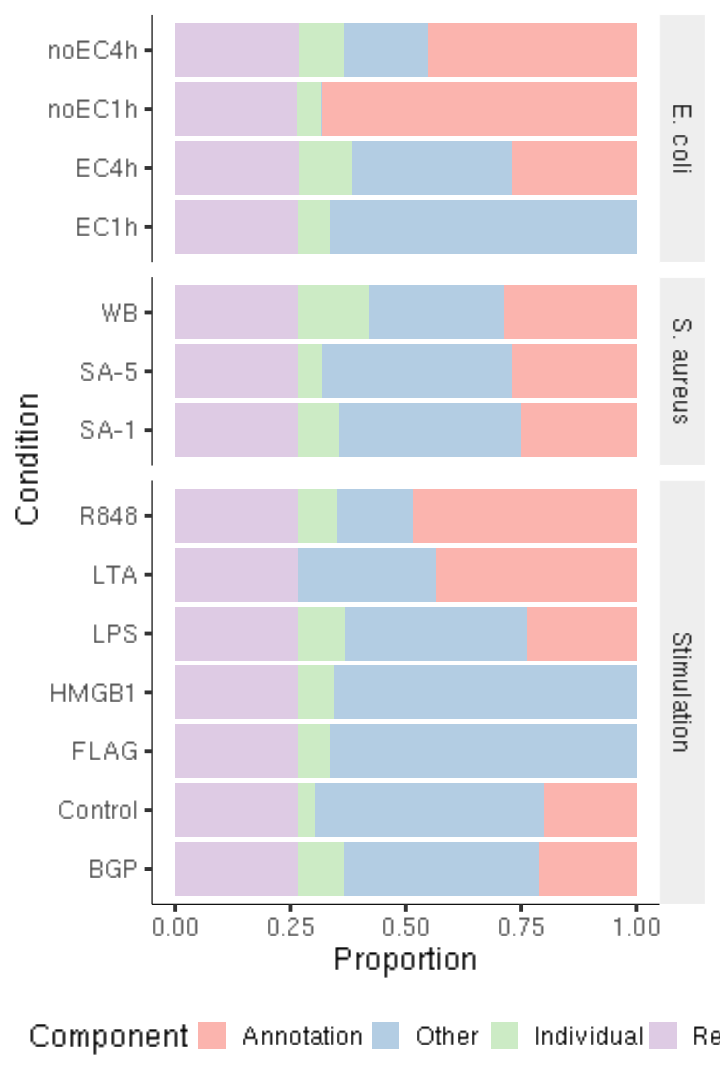

In [117]:
options(repr.plot.width=6, repr.plot.height=9)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_92_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Condition=gsub("Neutrophils-", "", Annotation)) %>%
    dplyr::mutate(Group=neutrophil.map[Condition])

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Condition, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Group ~ ., scale="free", space="free") +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/integration_module_92_neutrophil_heritability.pdf", width=6, height=9)

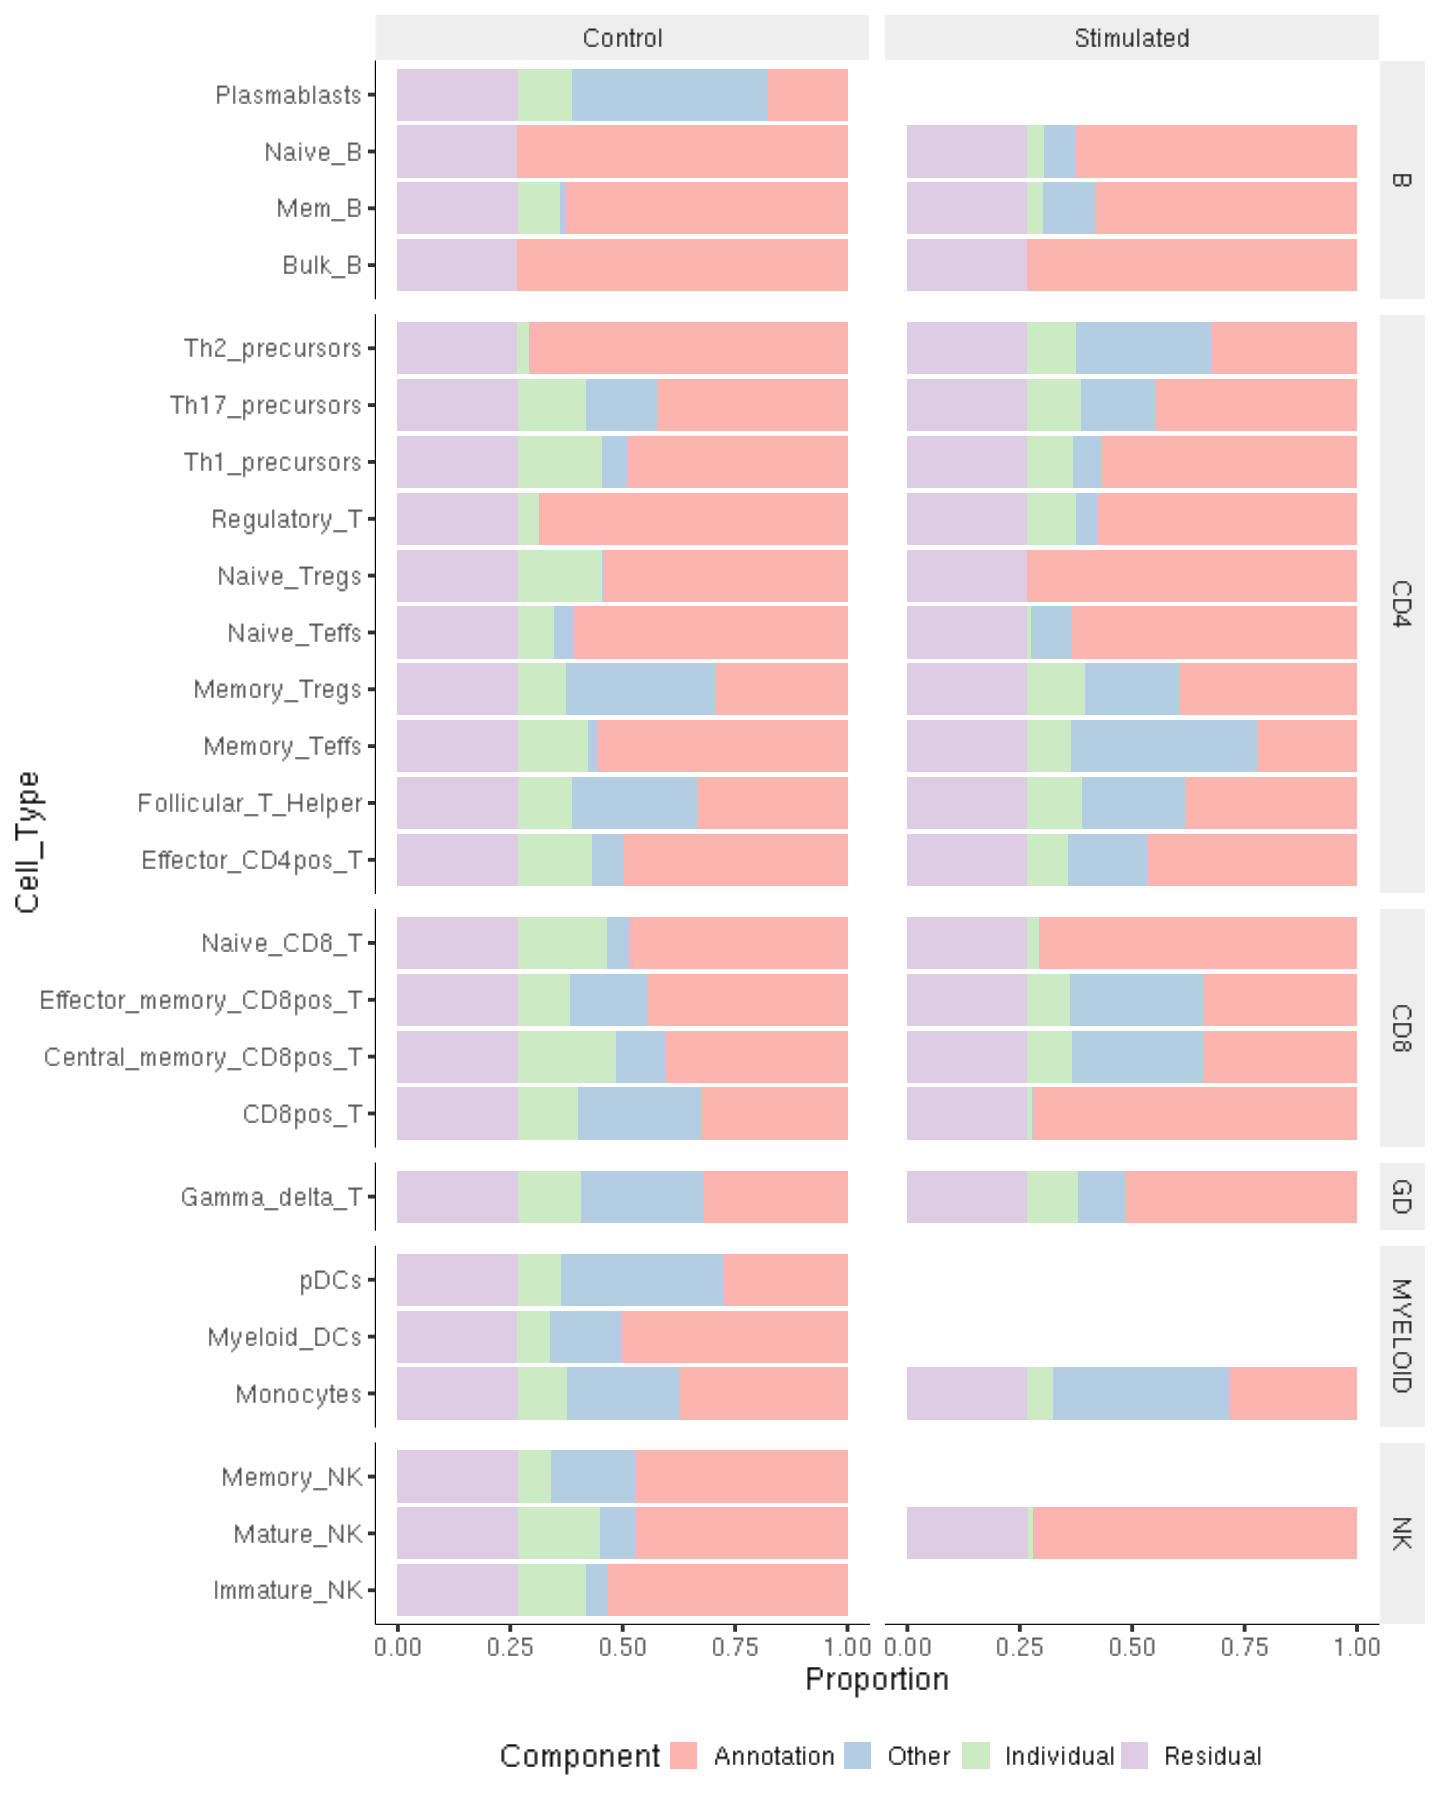

In [118]:
options(repr.plot.width=12, repr.plot.height=15)

plot.data <- var.comps %>%
    dplyr::filter(Eigengene == "ME_92_1") %>%
    dplyr::filter(!grepl("segments", Annotation)) %>%
    dplyr::filter(!grepl("cCREs", Annotation)) %>%
    dplyr::filter(!grepl("Neutrophils", Annotation)) %>%
    dplyr::filter(!is.na(Proportion)) %>%
    dplyr::mutate(Component=factor(Component, levels=c("Annotation", "Other", "Individual", "Residual"))) %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", Annotation)) %>%
    dplyr::mutate(Condition=gsub("^.*-", "", Annotation)) %>%
    merge(., lineages, by="Cell_Type")

sort.data <- plot.data %>%
    dplyr::select(Annot = Annotation, Component, Proportion) %>%
    tidyr::spread(Component, Proportion) %>%
    dplyr::arrange(Annotation, Other, Individual, Residual)

plot.data$Annotation <- factor(plot.data$Annotation, levels=sort.data$Annot)
                               
plot.data %>%
    ggplot() +
    geom_bar(aes(x=Cell_Type, y=Proportion, fill=Component), stat="identity") +
    scale_fill_brewer(palette="Pastel1") +
    coord_flip() +
    facet_grid(Lineage ~ Condition, scale="free", space="free") +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/integration_module_92_immune_heritability.pdf", width=12, height=15)